## Dataset 

House Prices - Advanced Regression Techniques(https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [ ]:
ls -1ha /content/drive/MyDrive/kaggle.json

/content/drive/MyDrive/kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         72           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         71           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        563           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        141           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1470           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14584            True  
house-pr

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 21.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.1MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 62.1MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.1MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#load date
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

데이터를 이해하기 위해서는, 우리의 각각의 변수에 대해 그것들의 의미를 이해하고, 문제와 어떤 관련이 있는지 살펴볼 필요가 있다.

- Variable
 - Type
  - Numerical : 변수가 숫자
  - Categorical : 변수가 카테고리, 범주형

- 81개의 변수와 1460개의 관측치로 구성되어 있음
- SalePrice 는 종속 변수로 보이며, 단위는 달러로 추정

In [ ]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

# 편의상 수치형 변수와 명목형 변수를 나눠줍니다.
# 수치형 변수는 38개, 명목형 변수는 43개가 있습니다.

Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

# 변수명을 확인해봅니다. 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
********************************************************************************
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual'

# Columns

- SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.

- MSSubClass: The building class

- MSZoning: The general zoning classification

- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet

- Street: Type of road access

- Alley: Type of alley access

- LotShape: General shape of property

- LandContour: Flatness of the property

- Utilities: Type of utilities available

- LotConfig: Lot configuration

- LandSlope: Slope of property

- Neighborhood: Physical locations within Ames city limits

- Condition1: Proximity to main road or railroad

- Condition2: Proximity to main road or railroad (if a second is present)

- BldgType: Type of dwelling

- HouseStyle: Style of dwelling

- OverallQual: Overall material and finish quality

- OverallCond: Overall condition rating

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date

- RoofStyle: Type of roof

- RoofMatl: Roof material

- Exterior1st: Exterior covering on house

- Exterior2nd: Exterior covering on house (if more than one material)

- MasVnrType: Masonry veneer type

- MasVnrArea: Masonry veneer area in square feet

- ExterQual: Exterior material quality

- ExterCond: Present condition of the material on the exterior

- Foundation: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 회귀 분석의 4가지 가정

1. 선형성
 : 예측하고자 하는 종속 변수 y와 독립변수 x간에 선형성을 만족하는 특성

 : 만약 변수 중 일부가 선형성을 만족하지 않는다면,
  - 첫째, 다른 새로운 변수 추가
  - 둘째, 로그, 지수, 루트 등 변수 변환 취하기
  - 셋째, 선형성을 만족하지 않은 변수 제거
  - 넷째, 일단 선형 회귀 모델을 만들고 변수 선택법을 통과시키는 것등의 방법이 있음.

    네 번째 유효한 방법인 경우가 많다.


2. 독립성
 : "다중" 회귀 분석의 중요한 기본 가정
 : 독립성이란, 독립변수 x간의 상관관계가 없이 독립성을 만족하는 특성
 
 : 다중공산성, 즉 상관관계가 있다면 이를 제거해줘야 함.

3. 등분상성
 : 분산이 같다. 특정한 패턴 없이 고르게 분포했다는 의미
 : 등분산성의 주체는 잔차.

4. 정규성
 : 잔차가 정규성을 만족하는지 여부




In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

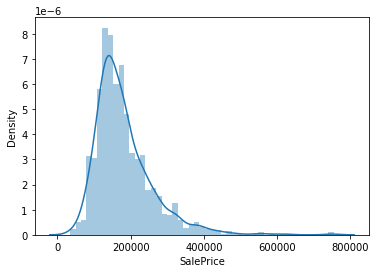

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

현재 데이터 분포는 정규분포와 약간 다름



- 정규분포로 바꾸는 방법들이 무엇이 있을까? 바꾸면 무슨 이점이 있을까?


- 데이터 분석을 하다 보면 변수들 간의 척도 (scale) 가 서로 다른 경우 직접적으로 상호 비교를 할 수가 없습니다.  모델링에서는 척도(scale)가 다름으로 인해서 모수의 왜곡이 생길 수도 있습니다.

- 따라서 모델링 작업에 들어가기 전에 변수들 간의 척도가 다른 경우에는 보통 표준화(scale standization)를 진행합니다.

- 표준화 중에서도 모집단이 '정규분포 (normal distribution, Gaussian distribution)을 따르는 경우 평균이 0, 표준편차는 1 인 표준정규분포(standard normal distribution)로 표준화 하는 방법을 많이 사용합니다. 


고려해볼 수 있는 정규화 하는 방법들은

1. Min-Max Normalization(최소-최대 정규화)

최소-최대 정규화는 데이터를 정규화하는 가장 일반적인 방법이다. 모든 feature에 대해 각각의 최소값 0, 최대값 1로, 그리고 다른 값들은 0과 1 사이의 값으로 변환하는 거다.

예를 들어 어떤 특성의 최소값이 20이고 최대값이 40인 경우, 30은 딱 중간이므로 0.5로 변환된다.

2. Z-score Normalzation(Z-점수 정규화)

- 최소 최대 정규화: 모든 feature들의 스케일이 동일하지만, 이상치(outlier)를 잘 처리하지 못한다.


- Z-점수 정규화 : 이상치(outlier)를 잘 처리하지만, 정확히 동일한 척도로 정규화 된 데이터를 생성하지는 않는다.

ex)

(1) numpy : z = (x-mean())/std()

(2) scipy.stats : zscore()

(3) sklearn.preprocessing : StandardScaler().fit_transform()


- (1) Numpy를 이용한 표준화 : z = (x-mean()) /std()

In [ ]:
import numpy as np

data = np.random.randint(30,size=(6,5))

data

array([[ 1, 16, 25,  4, 26],
       [13,  6, 17,  6, 15],
       [23, 20,  2,  2,  9],
       [23, 24, 27, 17,  3],
       [11,  1,  1,  4,  6],
       [28, 13,  1, 10, 11]])

In [ ]:
from numpy import *

data_standadized_np = (data - mean(data, axis=0)) / std(data, axis=0)

data_standadized_np

array([[-1.69878954,  0.33897088,  1.13964695, -0.62743528,  1.92881361],
       [-0.38359764, -0.93216992,  0.42921768, -0.23116037,  0.4485613 ],
       [ 0.71239561,  0.8474272 , -0.9028372 , -1.02371019, -0.35884904],
       [ 0.71239561,  1.35588352,  1.31725427,  1.94835165, -1.16625939],
       [-0.60279629, -1.56774031, -0.99164086, -0.62743528, -0.76255422],
       [ 1.26039224, -0.04237136, -0.99164086,  0.56138946, -0.08971226]])

- 평균(mean): np.mean(arr)
- 표준편차(standard deviation): np.std(arr)
- 분산(variance): np.var(arr)

In [ ]:
import numpy as np

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])



print('mean:', np.mean(arr))

print('standard deviation:', np.std(arr))

print('variance:', np.var(arr))


mean: 5.0
standard deviation: 3.1622776601683795
variance: 10.0


In [ ]:
# check of 'mean=0', 'standard deviation=1'

mean(data_standadized_np, axis=0)

array([ 7.40148683e-17, -8.09537622e-17,  3.70074342e-17, -1.11022302e-16,
        1.61907524e-17])

In [ ]:
mean(data_standadized_np,axis=1)

array([ 0.21624133, -0.13382979, -0.14511472,  0.83352513, -0.91043339,
        0.13961144])

In [ ]:
std(data_standadized_np, axis=0)

array([1., 1., 1., 1., 1.])

In [ ]:
std(data_standadized_np, axis=1)

array([1.27904478, 0.52257172, 0.78895109, 1.07363875, 0.356439  ,
       0.74826267])

In [ ]:
import numpy as np

matrix = np.array([[1,2],[3,4]])

norms = np.linalg.norm(matrix, axis=1)
print(matrix/norms)

[[0.4472136  0.4       ]
 [1.34164079 0.8       ]]


(2) scipy.stats을 이용한 표준화 : ss.zscore()

In [ ]:
import scipy.stats as ss

data_standadized_ss = ss.zscore(data)

data_standadized_ss

array([[-1.69878954,  0.33897088,  1.13964695, -0.62743528,  1.92881361],
       [-0.38359764, -0.93216992,  0.42921768, -0.23116037,  0.4485613 ],
       [ 0.71239561,  0.8474272 , -0.9028372 , -1.02371019, -0.35884904],
       [ 0.71239561,  1.35588352,  1.31725427,  1.94835165, -1.16625939],
       [-0.60279629, -1.56774031, -0.99164086, -0.62743528, -0.76255422],
       [ 1.26039224, -0.04237136, -0.99164086,  0.56138946, -0.08971226]])

(3) sklearn. preprocessing을 이용한 표준화



In [ ]:
from sklearn.preprocessing import StandardScaler

data_standadized_skl = StandardScaler().fit_transform(data)

data_standadized_skl


array([[-1.69878954,  0.33897088,  1.13964695, -0.62743528,  1.92881361],
       [-0.38359764, -0.93216992,  0.42921768, -0.23116037,  0.4485613 ],
       [ 0.71239561,  0.8474272 , -0.9028372 , -1.02371019, -0.35884904],
       [ 0.71239561,  1.35588352,  1.31725427,  1.94835165, -1.16625939],
       [-0.60279629, -1.56774031, -0.99164086, -0.62743528, -0.76255422],
       [ 1.26039224, -0.04237136, -0.99164086,  0.56138946, -0.08971226]])

**(4) log 변환**

왜도(Skewnesss)와 첨도(Kurtosis)가 높은 데이터로는 상관성을 파악하기 어려울 수 있다. 

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdaPvlp%2FbtqF4ULXp3i%2FnvYNHxAXFShYpqU4uGoM41%2Fimg.png'>


왜도(비대칭도)란, 확률변수의 확률분포가 비대칭성을 가지고 있음을 뜻한다. 

영어로는 Skewness라고 하며 a=0이면 정규분포, a<0이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침을 의미한다.

첨도란, 확률분포의 뾰족한 정도를 뜻한다. 

영어로는 Kurtosis라고 하며 a=3이면 정규분포, a<3이면 정규분포보다 완만함, a>3이면 정규분포 보다 뾰족함을 의미한다.

 

이러한 특징들을 가진 변수를 정규분포에 가깝게 만들어주기 위해 변수에 Log를 취해준다. 

 

Log를 취해주게 되면 큰 숫자를 같은 비율의 작은 숫자로 만들어주며, 첨도와 왜도가 줄어들면서 정규성이 높아진다.

이는 분석의 정확도를 더 높일 수 있는 결과를 가져온다. 


위의 로그 그래프를 보면 그래프의 증가 폭이 갈수록 줄어들고 있습니다.


즉 x축 변화량에 따른 y축 변화량이 작다는 의미, 이는 큰 수를 같은 비율의 작은 수로 바꿔주는 역할을 합니다.

이러한 특징은 데이터 사이 값의 편차가 큰 특성의 경우에 유용하게 사용됩니다.


편차를 줄여주면 그래프의 왜도(skewness)와 첨도(kurtosis)를 줄일수 있기 때문에 정규성이 높아지는 장점도 있습니다.

정규화의 역할을 한다고 볼 수 있음.


마지막으로 로그끼리의 곱은 덧셈으로, 나눗셈은 뺄셈으로 나타낼 수 있기 때문에 계산을 단순화 시켜주는 이점도 있습니다.
 

로그를 사용한 후에는 원래 값으로 되돌리는 작업이 필요함!  아래와 같이 로그의 역함수인 지수함수를 이용하면 됩니다.

np.log() <-> np.exp()

np.log1p() <-> np.expm1()


이를 테면, 나이와 재산의 관계를 볼 때, 나이는 1~100까지의 범주를 갖지만, 재산은 0원에서 수조원까지 아주 넓게 분포할 수 있다. 게다가 특정 영역에 (이를테면 1억원) 치우쳐 있다면, 그 외의 값들은 왜곡되어 해석될 가능성이 높다. 이런 데이터를 정규분포에 맞게 변형 시켜주는 것이 Log-Transform이다. 


아래 타이타닉 데이터의 예제를 보자. 

In [ ]:
import pandas as pd

df_train_ta = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [ ]:
numerical_feats = df_train_ta.dtypes[df_train_ta.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df_train_ta.dtypes[df_train_ta.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [ ]:
for col in numerical_feats: 
  print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(df_train_ta[col].skew()) , 
        ' ' , 
        'Kurtosis: {:06.2f}'.format(df_train_ta[col].kurt()) )

PassengerId     Skewness: 00.00   Kurtosis: -01.20
Survived        Skewness: 00.48   Kurtosis: -01.78
Pclass          Skewness: -0.63   Kurtosis: -01.28
Age             Skewness: 00.39   Kurtosis: 000.18
SibSp           Skewness: 03.70   Kurtosis: 017.88
Parch           Skewness: 02.75   Kurtosis: 009.78
Fare            Skewness: 04.79   Kurtosis: 033.40


위의 결과에서 Skewness와 Kurtosis가 가장 높은 "Fare"을 사용하여 Log를 취해주도록 하겠다. 

 

먼저 시각적으로 왜도, 첨도를 얼마나 가지고 있는지 확인해 보기 위해 plot을 하나 그려준다. 


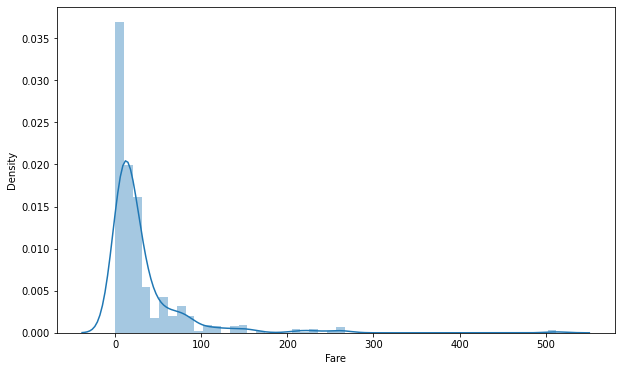

In [ ]:
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(df_train_ta["Fare"])

시각화 결과 눈으로만 봐도 왜도와 첨도가 심한 것이 느껴진다. 

 

이제 Log를 취해준 "Log_Fare"라는 변수를 만들어주고 비교해보도록 하겠다.


Skewness: 0.395
Kurtosis: 0.976


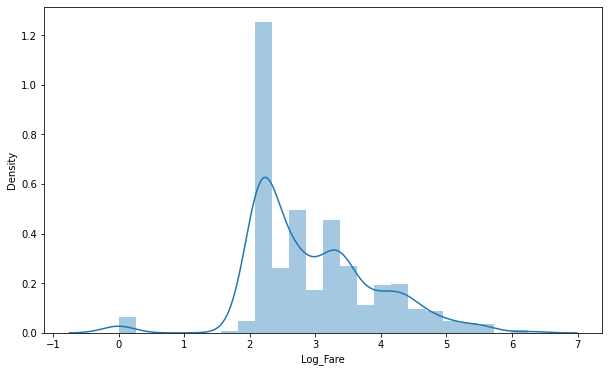

In [ ]:
df_train_ta["Log_Fare"] = np.log1p(df_train_ta["Fare"]) 
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_train_ta["Log_Fare"]) 
print("Skewness: {:.3f}".format(df_train_ta["Log_Fare"].skew())) 
print("Kurtosis: {:.3f}".format(df_train_ta["Log_Fare"].kurt()))

Log를 취해준 "Log_Fare"라는 변수를 만들고 왜도와 첨도를 확인해보았다. 

 

Skewness와 Kurtosis가 굉장히 많이 떨어졌고, plot 자체도 나름 정규 근사화가 된 것을 확인할 수 있다.


**stats.probplot 이란 ?**

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구이다.

qqplot은 분위수대조도로 불리는 정규모집단 가정을 하는 방법 중 하나이다. 수집 데이터를 표준정규분포의 분위수와 비교하여 그리는 그래프로 데이터의 정규성 가정에 대한 검토를 가능하게 한다.

**분위수 VS 사분위수**

분위수(Quantile)란 데이터의 분포에서 전체 넓이를 일정 비로 나누어 위치에 있는 값으로 사분위(Quartile)와 다른 것이다. 분위수가 사용된 예로 사분위를 들 수 있다. 복습 차원에서 사분위수를 되짚어보자면 통계학에서 Min(최솟값) - Q1(제1 분위수) - Median(중위수) - Q3(제3 분위수) - Max(최댓값)을 의미하는 개념으로 각 0분 위수(최솟값), 1/4 분위수(Q1), 2/4 분위수(Q2=중앙값), 3/4 분위수(Q3), 4/4 분위수(최댓값)를 의미한다.

qqplot에서도 마찬가지로 위와 같은 분위수 개념이 적용된다. qqplot은 표준정규분포의 분위수와 이에 대응하는 분포(측정한 실제 데이터의 분포)의 분위수를 x, y 좌표평면에 plotting하는 개념입니다.

x축의 y축 및 (대략) 예상 분위수에 따라 정렬된 샘플 값을 살펴볼 때, 그림의 일부 섹션에 있는 값이 이론적인 분포에서 가정하는 것보다 더 집중되어 있는지 아니면 덜 집중되어 있는지를 확인할 수 있다. 이 값을 그림으로 나타내면 그림일부 섹션에 있는 값이 전체 선형 추세와 어떻게 다른지 확인할 수 있다.

모집단이 정규성을 따른다면 직선의 형태로 그려지게 된다.

Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다.

 
1. 대상 샘플을 크기에 따라 정렬(sort)한다.
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4.대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다

**산점도의 점들이 저 빨간색 선 주위에 모일수록 정규분포를 띄고 있는 것이라고 보시면 됩니다.** 

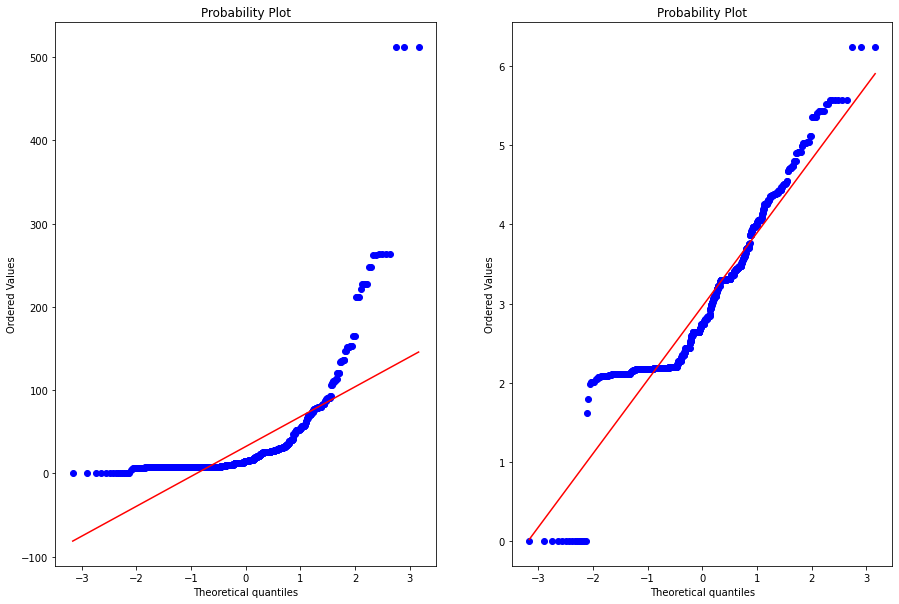

In [ ]:
from scipy import stats 

fig = plt.figure(figsize = (15,10)) 
fig.add_subplot(1,2,1) 
res = stats.probplot(df_train_ta['Fare'], plot=plt) 
fig.add_subplot(1,2,2) 
res = stats.probplot(df_train_ta['Log_Fare'], plot=plt)

**(5) box-cox 변환**

Box-Cox Transformation
데이터를 정규분포에 가깝게 만들거나 데이터의 분산을 안정화하는 것

정규성을 가정한 분석법을 적용하기에 앞서 데이터의 전처리에 사용

참고 : https://minji15.tistory.com/3




Box-Cox 변환은 정규 분포와 매우 유사하도록 데이터를 변환합니다.

많은 통계 기법에서 우리는 오류가 정규 분포를 따른다고 가정합니다. 이 가정을 통해 신뢰 구간을 구성하고 가설 검정을 수행 할 수 있습니다. 대상 변수를 변환하여 오류를 정규화 할 수 있습니다 (아직 정상이 아닌 경우).

또한 변수를 변환하면 변환이 백색 잡음을 제거 할 수 있기 때문에 모델의 예측력을 향상시킬 수 있습니다.

알파가 1이고 베타가 3 인 베타 분포가 있다고 가정합니다.이 분포를 플로팅하면 다음과 같이 보일 수 있습니다.

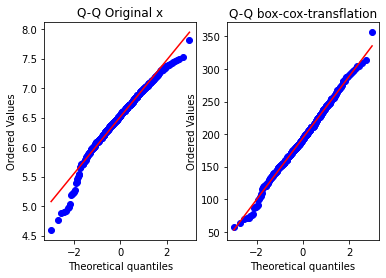

최적의 람다값 3.4639002055308095


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#log gamma continuous random variable 생성
x = stats.loggamma.rvs(5,size = 500) +5
# Q-Q 플롯 그리기
prob = stats.probplot(x, dist = stats.norm, plot = ax1)
ax1.set_title('Q-Q Original x')

# box-cox 변환 사용 -> 조금 더 정규화됨
x_trans, optimal_lambda = stats.boxcox(x)
prob = stats.probplot(x_trans, dist = stats.norm, plot = ax2)
ax2.set_title('Q-Q box-cox-transflation')
plt.show()

#box-cox 최적의 lambda 값 찾는법
print('최적의 람다값', optimal_lambda)

모델링을 할때, 한쪽으로 쏠린 데이터나, 잔차그래프에서 점점 분산이 커지는 것을 데이터를 만나는 경우가 많은데

이경우 적용할 수 있는 방법 중 하나가 Y를 변환해주는 것이다.
box-cox 변환을 일반적으로 많이 사용하고 있다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FKNJbT%2FbtqExt3JRFV%2F0NeHuNaj17UhJVNhcF7Ld1%2Fimg.png'>

하지만 Box-Cox변환은 y가 0이거나 0보다 작은 경우는 적용할 수 없다는 한계가 있다.

이를 개선하는 방법으로 제안된 것이 **Yeo-Johnson Power Transformations**이다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbzLYUZ%2FbtqExZumVff%2Fn0yFpPDrvoMqFFSm1neL1k%2Fimg.png'>



 

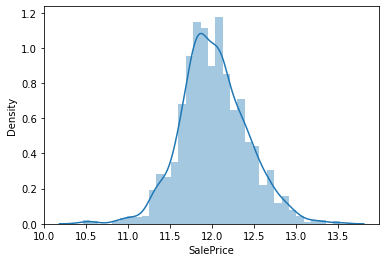

In [ ]:
#histogram
sns.distplot(np.log1p(df_train['SalePrice']));

- Target with Skewnees and Kurtosis

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Relationship with numerical variables

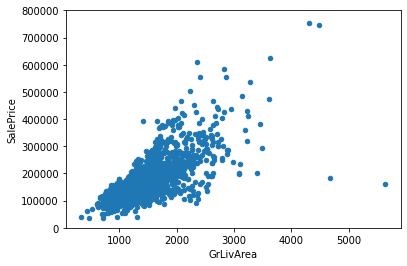

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'SalePrice'과 'GrLivArea'은 선형 관계이다.

'TotalBsmtSF'은 어떻까?

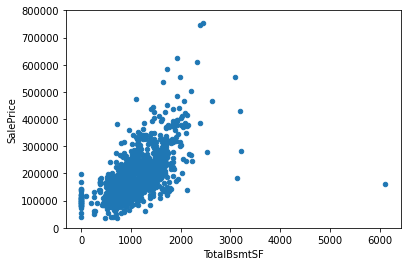

In [ ]:
#scatter plot grlivarea/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

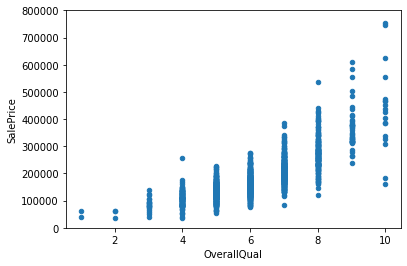

In [ ]:
#scatter plot grlivarea/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

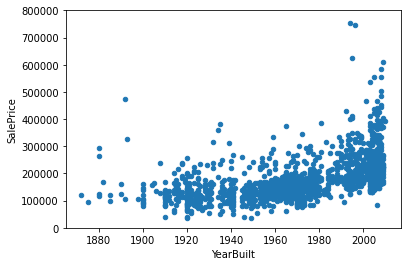

In [ ]:
#scatter plot grlivarea/saleprice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**Categorical Feature** 분석

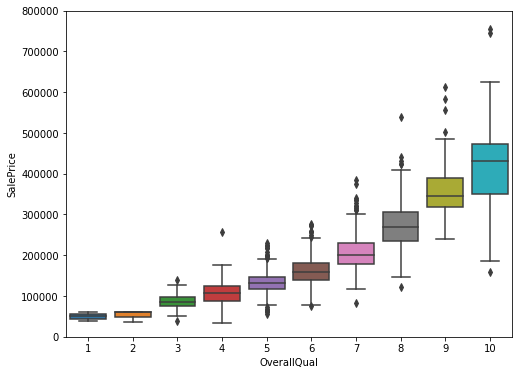

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

확실히 전체적인 퀄리티(EverallQual)가 SalePrice에 큰 영향을 미친다.

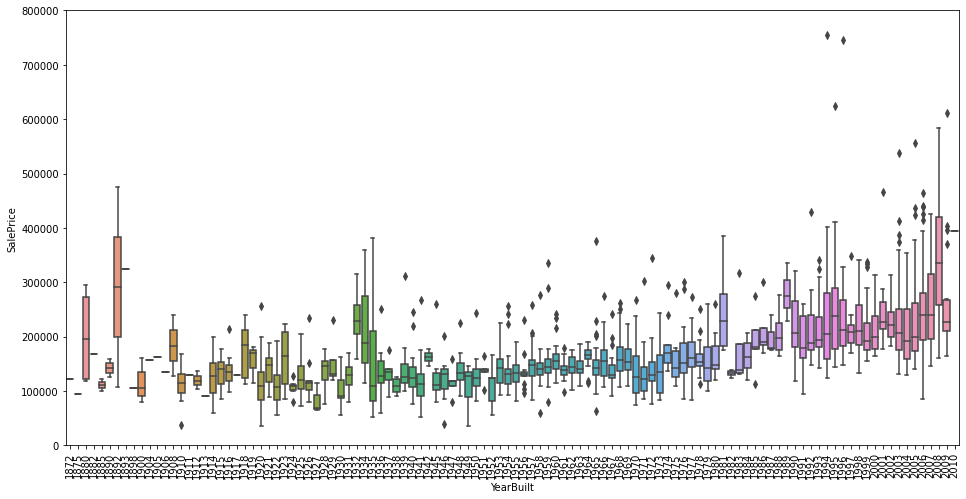

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

강력한 관계는 없지만 오래된 연식보다는 새로운 연식이 다소 가격이 높다.

Note: 우리는 'SalePrice'가 일정한 가격인지 알 수 없다. 일정한 가격은 인플레이션을 제거한다. 만약 가격이 일정하지 않다면, 몇 년 동안 가격이 비교될 수 있는 가격보다 더 비싸야 한다.

지금까지 우리는 단지 직관을 따르고 중요하다고 생각하는 변수들을 분석했을 뿐이다. 객관적으로 분석하려고 노력했음에도 불구하고, 출발점이 주관적이었다는 뜻이다.

엔지니어로서, 나는 이런 접근방식이 불편한다. 나는 주관성을 배제하려고 한다.. 그럴만한 이유가 있다. 구조 공학에서는 사람의 주관이 많이 들어가면 물리적으로 구조물들이 무너지게 된다.

그러니까, 이제 주관을 배제하고 객관적인 분석을 해보자.

## Skewness(비대칭도 확인)

In [ ]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index 
print("Number of Numerical features: ", len(numerical_feats)) 
categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index 
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  38
Number of Categorical features:  43


In [ ]:
for col in numerical_feats:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )
    
# 수치형 변수의 Skewness(비대칭도), Kurtosis(첨도)를 확인합니다.
# 이는 분포가 얼마나 비대칭을 띄는가 알려주는 척도입니다. (비대칭도: a=0이면 정규분포, a<0 이면 오른쪽으로 치우침, a>0이면 왼쪽으로 치우침)
# 비대칭도와 첨도를 띄는 변수가 여럿 보입니다. Target Feature인 "SalePrice" 또한 약간의 정도를 보이는 것으로 보입니다.

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

# EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

- 실용적인 탐색방법

데이터를 탐색하기 위해, 몇 가지 실용적인 방법으로 시작할 예정이다.

 - Correlation matrix (heatmap style).
 - 'SalePrice' Correlation matrix (zoomed heatmap style).
 - 가장 관련 높은 변수들 사이의 Scatter plots (move like Jagger style).


**Correlation matrix (heatmap style)**

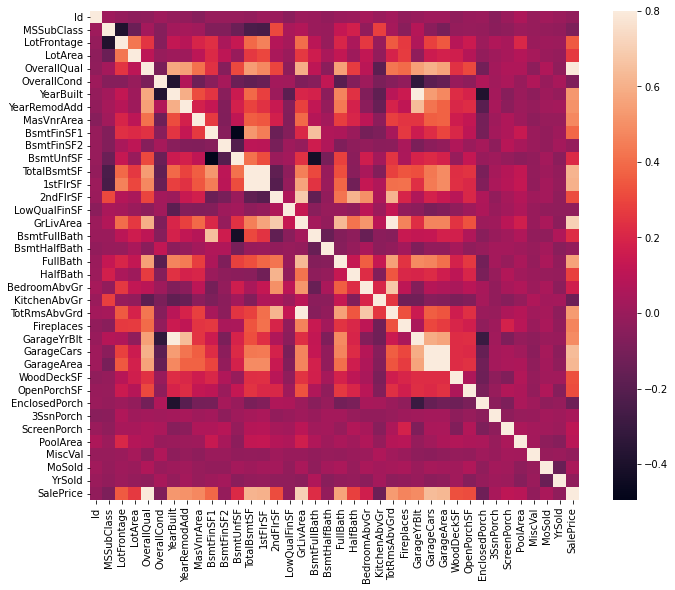

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

첫눈에 관심을 끄는 두 개의 빨간색 사각형이 있다. 첫 번째는 'TotalBsmt'와 '1 stFlrSF'이다. 그리고 두 번째는 'GarageX' 변수들이다. 두 경우 모두 이러한 변수 사이의 상관관계가 크다는 것을 보여준다. 이 상관관계가 너무 강해서 다공성(multicollinearity) 상태를 나타낼 수 있다. 이 변수들에 대해 생각해보면, 이것들이 거의 동일한 정보를 제공하므로 실제로 다공성이 발생한다는 결론을 내릴 수 있다. 히트맵은 이러한 상황을 감지하는 데 매우 좋고, 우리와 같이 피쳐 선택이 필수적인 문제에서는 필수적인 도구다.

관심을 끈 또 다른 것은 'SalePrice' 상관관계이다. 잘 알려진 'GrlivArea', 'TotalBsmtSF'를 볼 수 있다. 'OverallQuality'도 중요하지만, 우리는 또한 고려해야 할 많은 다른 변수들을 볼 수 있다. 그것들이 우리가 다음에 할 일이다.

 
**'SalePrice' correlation matrix (zoomed heatmap style)**

**Correlation matrix (heatmap style)**

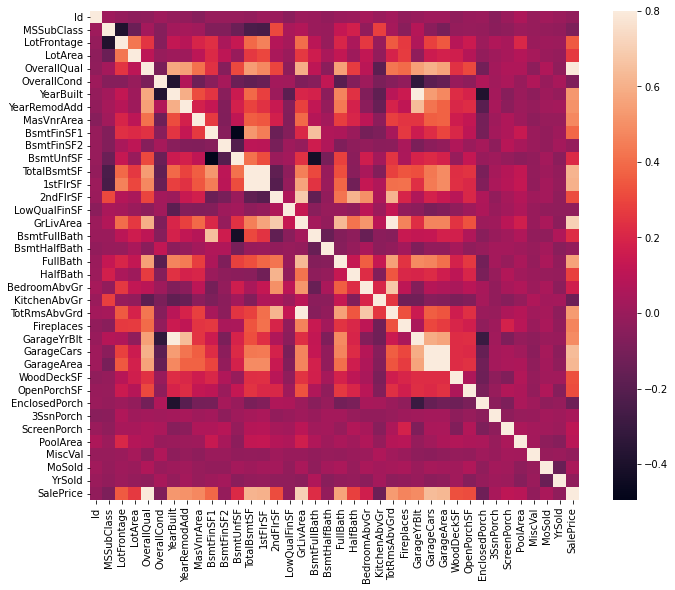

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

첫눈에 관심을 끄는 두 개의 빨간색 사각형이 있다. 첫 번째는 'TotalBsmt'와 '1 stFlrSF'이다. 그리고 두 번째는 'GarageX' 변수들이다. 두 경우 모두 이러한 변수 사이의 상관관계가 크다는 것을 보여준다. 이 상관관계가 너무 강해서 다공성(multicollinearity) 상태를 나타낼 수 있다. 이 변수들에 대해 생각해보면, 이것들이 거의 동일한 정보를 제공하므로 실제로 다공성이 발생한다는 결론을 내릴 수 있다. 히트맵은 이러한 상황을 감지하는 데 매우 좋고, 우리와 같이 피쳐 선택이 필수적인 문제에서는 필수적인 도구다.

관심을 끈 또 다른 것은 'SalePrice' 상관관계이다. 잘 알려진 'GrlivArea', 'TotalBsmtSF'를 볼 수 있다. 'OverallQuality'도 중요하지만, 우리는 또한 고려해야 할 많은 다른 변수들을 볼 수 있다. 그것들이 우리가 다음에 할 일이다.

 
**'SalePrice' correlation matrix (zoomed heatmap style)**

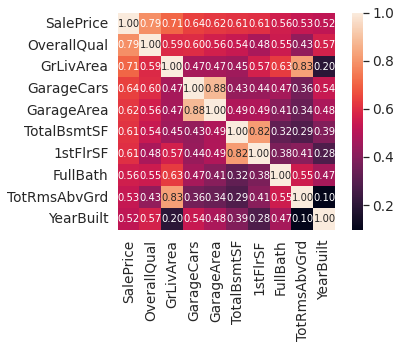

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- OverallQual', 'GrLivArea' 와 'TotalBsmtSF'는 'SalePrice'와 강한 상관 관계가 있다. Check!
- 'GarageCars'와 'GarageArea'는 가장 상관 관계가 높은 변수들이다. 하지만 마지막에 말했던것과 같이, 두개는 거의 똑같은 의미를 가진다. (구분할수 있는 사람이 있을까?) 이 둘은 쌍둥이 형제나 마찬가지다. 따라서 우리는 분석에서 둘중 하나만 필요하다.('GarageCars'가 'SalePrice'보다 관계가 높으므로 'GarageCars'만 유지할 수 있다)
- 'TotalBsmtSF'와 '1stFloor'도 쌍둥이 처럼 보인다. 우리는 'TotalBsmtSF' 만 사용하면 될 듯 하다.

'TotRmsAbvGrd'와 'GrLivArea', 또 다시 쌍둥이다. 체르노빌에서 생성된 데이터인가?
아... 'YearBuilt'... 'YearBuilt'는 'SalePrice'와 약한 상관 관계가 있는듯하다. 

- 가장 관련 높은 변수들 사이의 Scatter plots (move like Jagger style)

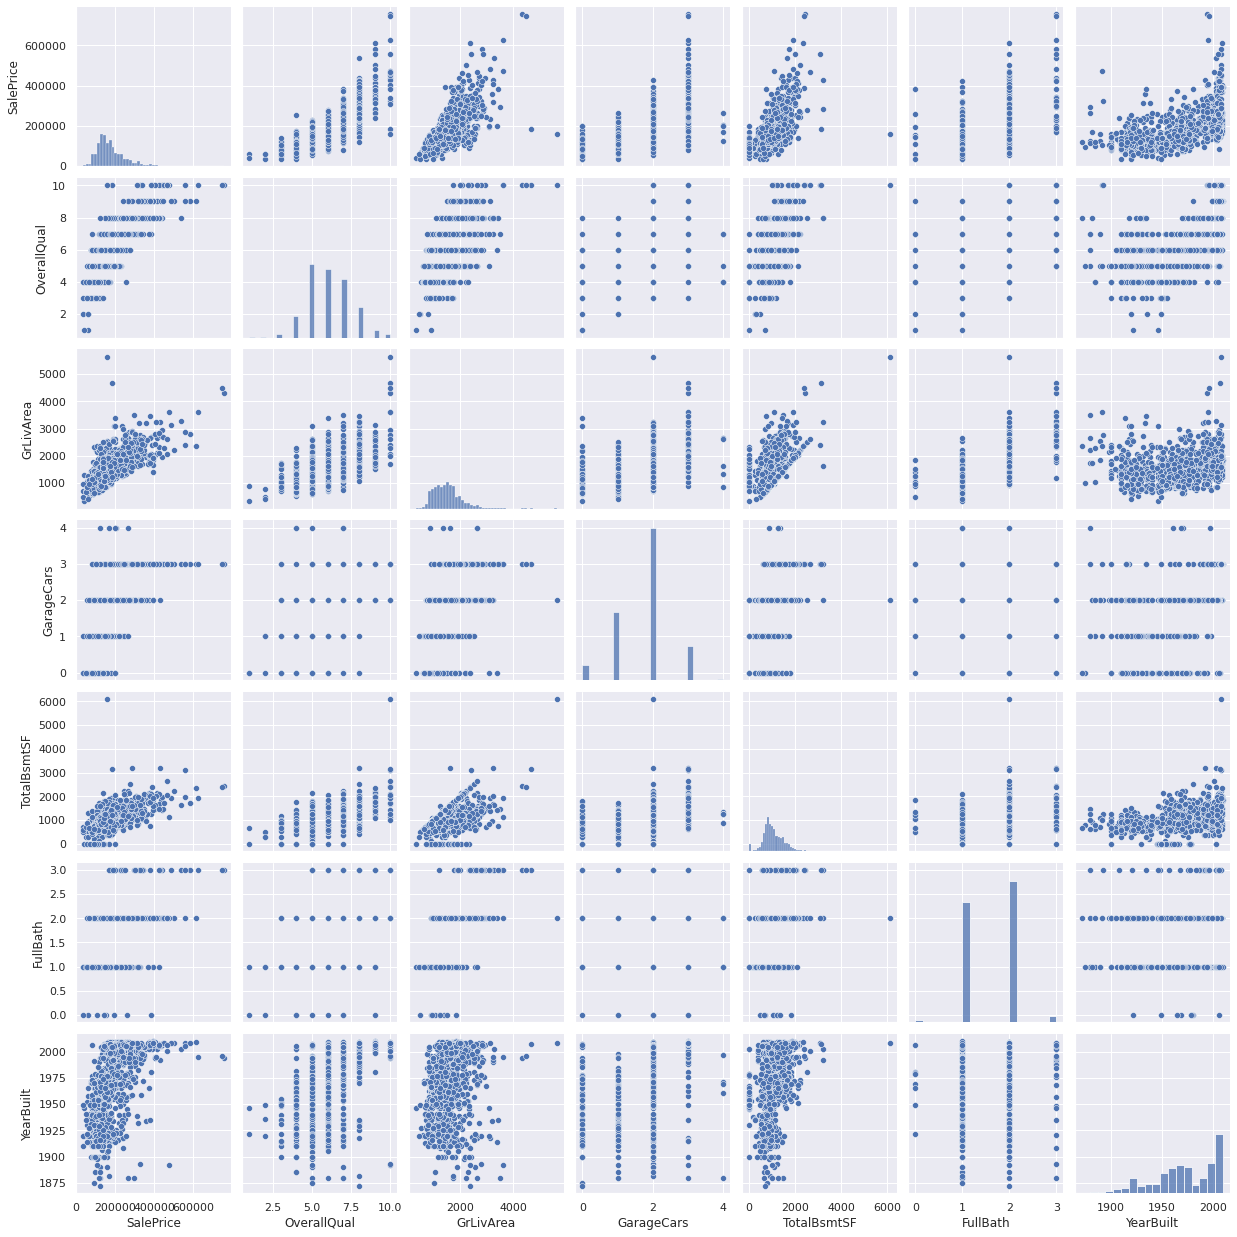

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

흥미롭게 볼만한 수치 중 하나는 'TotalBsmtSF'와 'GrLiveArea' 사이의 숫자이다. 이 그림에서 우리는 점들이 거의 경계선처럼 작용하는 선을 그리는 것을 볼 수 있다.

## Missing value check

missing data에 대해 생각할 때 중요한 질문:

- missing data가 얼마나 보편적인가?
- missing data가 랜덤인가? 패턴이 있는가?

질문에 대한 답은 실용적인 이유로 중요하다. 왜냐하면 누락된 데이터는 표본 크기의 축소를 의미할 수 있기 때문이다. 분석을 진행하는 것을 방해할 수 있다. 더구나 실체적 관점에서 보면 누락된 데이터 과정이 편파적이지 않고 불편한 진실을 숨기지 않도록 해야 한다.

In [ ]:
#missing train data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


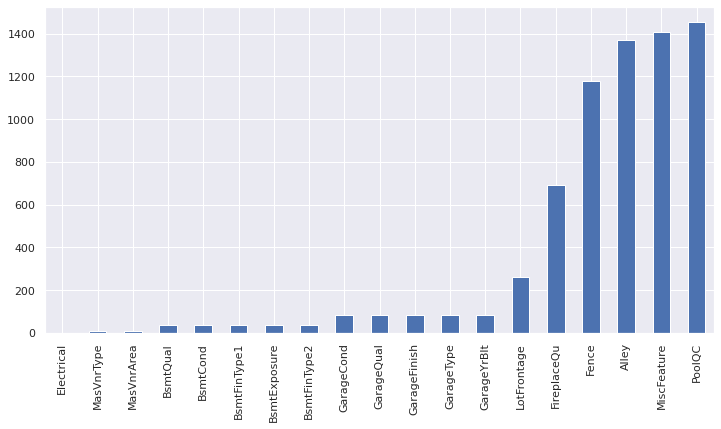

In [ ]:
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (12,6))

# 직관적으로 확인하기 위해 barplot을 그려봅니다.

In [ ]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = df_train.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [ ]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


In [ ]:
print('Number of null values of MasVnrType *Before* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *Before* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *Before* :', modify_data['Electrical'].isnull().sum(), '\n')

modify_data['MasVnrType'].fillna('None', inplace = True)
modify_data['MasVnrArea'].fillna(0, inplace = True)
modify_data['Electrical'].fillna(modify_data['Electrical'].mode()[0], inplace = True)

print('Number of null values of MasVnrType *After* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *After* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *After* :', modify_data['Electrical'].isnull().sum())

Number of null values of MasVnrType *Before* : 8 

Number of null values of MasVnrArea *Before* : 8 

Number of null values of Electrical *Before* : 1 

Number of null values of MasVnrType *After* : 0 

Number of null values of MasVnrArea *After* : 0 

Number of null values of Electrical *After* : 0


In [ ]:
# 'LotFrontage' 변수의 결측치를 예측하기 위한 변수 추출
miss_list = ['Id', 'MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', '1stFlrSF', 
             'BldgType', 'GrLivArea', 'LotArea', 'LotFrontage']

# 데이터 추출
miss_data = modify_data[miss_list]

print('Shape of miss_data :', miss_data.shape)
miss_data.head()

Shape of miss_data : (1460, 10)


,Id,MSSubClass,MSZoning,LotShape,LotConfig,1stFlrSF,BldgType,GrLivArea,LotArea,LotFrontage
0,1,60,RL,Reg,Inside,856,1Fam,1710,8450,65.0
1,2,20,RL,Reg,FR2,1262,1Fam,1262,9600,80.0
2,3,60,RL,IR1,Inside,920,1Fam,1786,11250,68.0
3,4,70,RL,IR1,Corner,961,1Fam,1717,9550,60.0
4,5,60,RL,IR1,FR2,1145,1Fam,2198,14260,84.0


In [ ]:
outlier_id = miss_data[miss_data['LotFrontage'] > 300]['Id']

# 'LotFrontage' 변수의 값이 300 넘는 관측치 삭제
miss_data = miss_data[~miss_data['Id'].isin(outlier_id)]
miss_data.reset_index(drop = True, inplace = True)

# 'NewLotShape' 변수 생성
print('Shape of miss_data *Before Create* :', miss_data.shape, '\n')

miss_data['NewLotShape'] = np.nan

for index in miss_data.index:
    
    if miss_data.loc[index, 'LotShape'] == 'Reg':
        miss_data.loc[index, 'NewLotShape'] = 'Reg'
        
    else:
        miss_data.loc[index, 'NewLotShape'] = 'Irreg'
        
print('Shape of miss_data *After Create* :', miss_data.shape, '\n')
print('Unique value of NewLotShape :', miss_data['NewLotShape'].unique())

Shape of miss_data *Before Create* : (1458, 10) 

Shape of miss_data *After Create* : (1458, 11) 

Unique value of NewLotShape : ['Reg' 'Irreg']


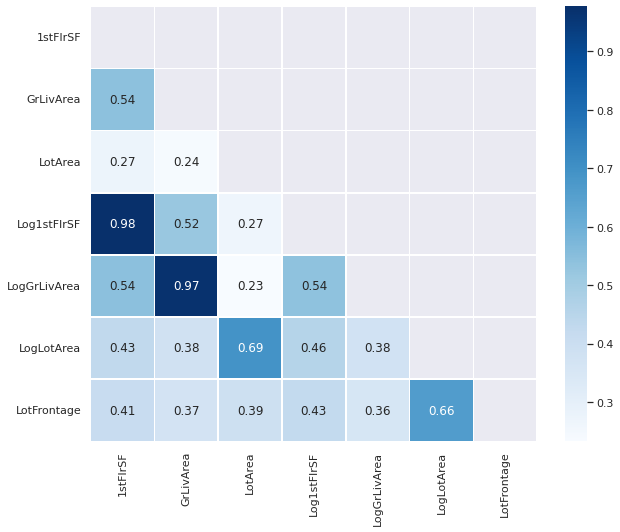

In [ ]:
# 연속형 변수를 로그화
miss_data['Log1stFlrSF'] = miss_data['1stFlrSF'].apply(lambda x: np.log1p(x))
miss_data['LogGrLivArea'] = miss_data['GrLivArea'].apply(lambda x: np.log1p(x))
miss_data['LogLotArea'] = miss_data['LotArea'].apply(lambda x: np.log1p(x))

# 로그화 수행 뒤 Heatmap
corr_data = miss_data[['1stFlrSF', 'GrLivArea', 'LotArea', 'Log1stFlrSF',
                       'LogGrLivArea', 'LogLotArea', 'LotFrontage']].corr()

# 'mask' 옵션 설정
mask = np.zeros_like(corr_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 시각화 과정
plt.figure(figsize = (10, 8))

sns.heatmap(corr_data, mask = mask, cmap = 'Blues', linewidth = 0.5, annot = True, fmt = ".2f")

In [ ]:
# 결측치를 없애기 위해 사용하고자 하는 변수 추출
value_list = ['Id', 'MSSubClass', 'MSZoning', 'NewLotShape', 'LotConfig', 'BldgType',
             'Log1stFlrSF', 'GrLivArea', 'LogLotArea', 'LotFrontage']

pre_miss_data = miss_data[~miss_data['LotFrontage'].isnull()][value_list]
print('Shape of pre_miss_data :', pre_miss_data.shape)

# 'MSSubClass' 변수 문자형 타입으로 변환
pre_miss_data['MSSubClass'] = pre_miss_data['MSSubClass'].astype('str')

pre_miss_data.head()

Shape of pre_miss_data : (1199, 10)


,Id,MSSubClass,MSZoning,NewLotShape,LotConfig,BldgType,Log1stFlrSF,GrLivArea,LogLotArea,LotFrontage
0,1,60,RL,Reg,Inside,1Fam,6.753438,1710,9.042040,65.0
1,2,20,RL,Reg,FR2,1Fam,7.141245,1262,9.169623,80.0
2,3,60,RL,Irreg,Inside,1Fam,6.825460,1786,9.328212,68.0
3,4,70,RL,Irreg,Corner,1Fam,6.869014,1717,9.164401,60.0
4,5,60,RL,Irreg,FR2,1Fam,7.044033,2198,9.565284,84.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
# RandomFroestRegressor 수행
data = pd.get_dummies(pre_miss_data, drop_first = True)

X = data.drop(['Id', 'LotFrontage'], axis = 1)
y = data['LotFrontage']

rf_model = RandomForestRegressor(random_state = 1025).fit(X, y)

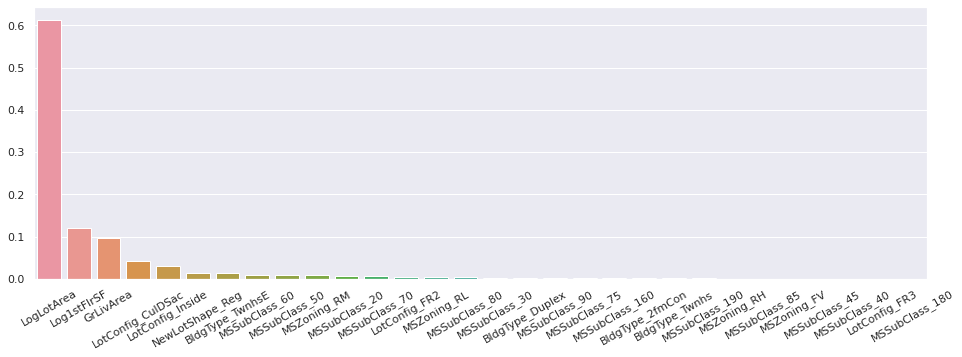

In [ ]:
# 변수의 중요도 시각화
feature_data = pd.DataFrame(rf_model.feature_importances_, index = X.columns, columns = ['Importance'])

plt.figure(figsize = (16, 5))

plot_data = feature_data.sort_values(by = 'Importance', ascending = False)

sns.barplot(x = plot_data.index, y = 'Importance', data = plot_data)
plt.xticks(rotation = 30)
plt.ylabel('')
plt.show()

- LogLotArea가 가장 높은 중요도를 나타내기 때문에 LogLotArea로 결측치를 채워주자.

- 이때 채워주기 위해서 knn-imputer를 사용하도록 하자.

참고 : https://wooono.tistory.com/103


**결측치의 종류**

- Random : 패턴이 없는 무작위 값
- No Random : 패턴을 가진 결측치

**결측치 처리 전략**
- 제거(Deletion)
- 대치(Imputation)
- 예측 모델(Prediction model)

**제거 (Deletion)**
 : 결측치의 특성이 '무작위로 손실' 되지 않았다면, 대부분의 경우 가장 좋은 방법은 제거하는 것이다.

 : 제거하는 방식은 목록 삭제(Listwist) 단일값 삭제(Pairwise) 방식으로 다시 구분된다.

 - 사용함수 : dropna()

  - pandas에서 제공하는 Na/NaN과 같은 누락 데이터를 제거하는 함수입니다.
  - axis: 파라미터 값으로 0을 주면 행 제거, 1을 주면 열 제거입니다. default값은 0입니다.
  - subset: array, 특정 feature를 지정하여 해당 Feature의 누락 데이터 제거가 가능합니다.

- 목록 삭제(ListWise)
 - 결측치가 이는 행은 전부 삭제

   - `df = df.dropna() `

 - 결측치가 이는 열은 전부 삭제(default 는 axis=0)

   - `df = df.dropna(axis=1) `

- 단일값 삭제(Pairwise)
  - 행 전체가 결측치인 행만 삭제
   - `df = df.dropna(how = all) `
  - 행의 결측치가 2개 초과인 행만 삭제
   - `df = df.dropna(thresh = 2) `
  - 특정 열들 중에 결측치가 있을 경우에 해당 행을 삭제
   - `df = df.dropna(subset = ['col1','col2','col3'], how = all) `








**결측치 삭제 상태 바로 적용하기**

결측치를 제거한 상태를 함수 사용 시에 바로 적용하려면 inplace 옵션을 True로 설정해주면 따로 데이터프레임을 지정해서 저장하지 않고도 바로 적용된다.



```
df.dropna(inplace = Ture)
```



**대치 (Imputation)**

: 결측치를 특정 값으로 대치하는 것이다.

- 대치 값 종류

  - 최빈값(mode)
   - 범주형에서 결측값이 발생시, 범주별 빈도가 가장 높은 값으로 대치한다.
  - 중앙값(median)
   - 숫자형(연속형)에서 결측값을 제외한 중앙값으로 대치방법
  - 평균(mean)
   - 숫자형(연속형)에서 결측값제외한 평균으로 대치방법
  - Similar case Imputation
   - 조건부 대치
  - Generalized Imputation
   - 회귀분석을 이용한 대치
**사용함수 : fillna(), replace(), interpolate()**

pandas에서 제공하는 누락 데이터에 특정 값을 채우는 함수이다.
각 함수의 기준에 맞게 NaN 값을 지정한 값으로 바꾸는 역할을 하게 된다.

- fillna()

  : 전체 결측치를 특정 단일값으로 대체하기
    - `df.fillna(0)`
- 특정열에 결측치가 있을 경우 다른 값으로 대체하기


```
 # 0으로 대체하기
  df['col'] = df['col'].fillna(0)

  # 컬럼의 평균으로 대체하기
  df['col'] = df['col'].fillna(df['col'].mean())
```

- 결측치 바로 이전 값으로 채우기

```
df.fillna(method = 'pad')
```

- 결측치 바로 이후 값으로 채우기

```
df.fillna(method = 'bfill')
```

- replace()



```
  # 결측치 값을 -50으로 채운다.
  df.replace(to_replace = np.nan, value = -50)
```

- inerploate()
  - interpolate는 인덱스를 무시하고 값들을 선형적으로 같은 간격으로 처리하게 된다.



```
df.interpolate(method = 'linear' , limit_direction = 'forward')
```










**예측 모델 (Prediction model)**

예측 기법을 사용한 결측치 추정은 결측치들의 특성이 패턴을 가진다고 가정하고 진행하게 된다.

결측값이 없는 컬럼들로 구성된 dataset으로 결측값이 있는 컬럼을 예측한다.

회귀 분석 기술을 활용하거나 SVM과 같은 기계 학습 방법 또는 이러한 결측치를 채우는 데이터 마이닝 방법과 같은 다양한 통계 방법이 있다.

**결측치 처리 가이드 라인**
- 10% 미만
  - 삭제 or 대치
- 10% ~ 50%
  - regression or model based imputation
- 50% 이상
  - 해당 컬럼(변수) 자체 제거

**K-nn Imputer 참고 : https://blog.naver.com/PostView.nhn?blogId=youji4ever&logNo=222013171055**

In [ ]:
# 'LotFrontage' 결측치를 대체해주는 함수 만들기
def imputer_lotfrontage(raw_data):
    
    print('Number of null values of LotFrontage *Before Modify* :', raw_data['LotFrontage'].isnull().sum(), '\n')
    
    # 'KNNImputer' 라이브러리 불러오기
    from sklearn.impute import KNNImputer
    
    # 'LotFrontage' 변수에 결측치를 가지는 'Id' 추출 후 저장
    miss_id = raw_data[raw_data['LotFrontage'].isnull()]['Id'].unique()
    
    # 'Id', 'LotFrontage', 'LotArea' 변수 추출 후 저장
    data = raw_data[['Id', 'LotFrontage', 'LotArea']]
    
    # 'LotFrontage' 변수의 값이 300 넘는 관측치를 삭제하기로 했으므로 삭제
    outlier_id = data[data['LotFrontage'] > 300]['Id']
    data = data[~data['Id'].isin(outlier_id)]
    
    # 'Id' 변수를 인덱스로 지정
    data = data.set_index('Id')
    
    # 'LotArea' 변수를 로그화 수행 후, 변수 삭제
    data['LotLogArea'] = data['LotArea'].apply(lambda x: np.log(x))
    data = data.drop('LotArea', axis = 1)
    
    # 모델 객체 생성 후 학습시키고 DataFrame으로 저장
    # 원본 데이터에 결측치로 기입되어 있는 관측치들만 수정해주기 위해 DataFrame을 만들 때, 인덱스를 위 데이터의 인덱스로 지정
    imputer = KNNImputer(n_neighbors = 5)
    pre_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns, index = data.index)
    
    # 결측치가 존재하던 관측치만 저장
    pre_data = pre_data[pre_data.index.isin(miss_id)]
    
    # 원본 데이터 결측치를 대입해주는 과정
    for id_value, lot_value in zip(pre_data.index, pre_data['LotFrontage']):
        for index in raw_data.index:
            
            if raw_data.loc[index, 'Id'] == id_value:
                raw_data.loc[index, 'LotFrontage'] = lot_value
    
    print('Number of null values of LotFrontage *After Modify* :', raw_data['LotFrontage'].isnull().sum())
 
    return raw_data

In [ ]:
# 생성한 함수 적용
modify_data = imputer_lotfrontage(modify_data)

Number of null values of LotFrontage *Before Modify* : 259 

Number of null values of LotFrontage *After Modify* : 0


- knnimputer를 이용하여 모든 결측치를 처리해 주었다.

In [ ]:
# 순서형 변수 중 문자열 타입으로 되어있는 변수를 변환
# 'ExterQual' & 'ExterCond'
mapping = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}

modify_data['ExterQual'] = modify_data['ExterQual'].map(mapping)
modify_data['ExterCond'] = modify_data['ExterCond'].map(mapping)

# 'BsmtQual' & 'BsmtCond'
mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['BsmtQual'] = modify_data['BsmtQual'].map(mapping)
modify_data['BsmtCond'] = modify_data['BsmtCond'].map(mapping)

# 'HeatingQC'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['HeatingQC'] = modify_data['HeatingQC'].map(mapping)

# 'KitchenQual'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['KitchenQual'] = modify_data['KitchenQual'].map(mapping)

# 'FireplaceQu'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['FireplaceQu'] = modify_data['FireplaceQu'].map(mapping)

# 'GarageQual' & 'GarageCond'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['GarageQual'] = modify_data['GarageQual'].map(mapping)
modify_data['GarageCond'] = modify_data['GarageCond'].map(mapping)

# 'PoolQC'
mapping = mapping = {'No have' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}

modify_data['PoolQC'] = modify_data['PoolQC'].map(mapping)

In [ ]:
print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 38 

Number of incorrectly entered value *CmentBd* : 60 

Number of incorrectly entered value *Brk Cmn* : 7


In [ ]:
modify_data.loc[modify_data['Exterior2nd'] == 'Wd Shng', 'Exterior2nd'] = 'Wd Sdng'
modify_data.loc[modify_data['Exterior2nd'] == 'CmentBd', 'Exterior2nd'] = 'CemntBd'
modify_data.loc[modify_data['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'BrkComm'

print('Number of incorrectly entered value *Wd Shng* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Wd Shng']), '\n')

print('Number of incorrectly entered value *CmentBd* :',
      len(modify_data[modify_data['Exterior2nd'] == 'CmentBd']), '\n')

print('Number of incorrectly entered value *Brk Cmn* :',
      len(modify_data[modify_data['Exterior2nd'] == 'Brk Cmn']))

Number of incorrectly entered value *Wd Shng* : 0 

Number of incorrectly entered value *CmentBd* : 0 

Number of incorrectly entered value *Brk Cmn* : 0


- 모든 결측치를 제거해 주었다.
- 이젠 변수를 살펴보며 의미있는 변수들을 만들어 주자.

In [ ]:
# 결측치 제거한 데이터를 final_data로 바꿔주자.
final_data = modify_data.copy()

In [ ]:
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

# 'NewCondition1' 변수 생성
final_data['NewCondition1'] = np.nan

for index in final_data.index:
    
    value = final_data.loc[index, 'Condition1']
    
    if (value == 'Artery') | (value == 'Feedr'):
        final_data.loc[index, 'NewCondition1'] = 'Street'
        
    elif (value == 'PosN') | (value == 'PosA'):
        final_data.loc[index, 'NewCondition1'] = 'Positive'
        
    elif value == 'Norm':
        final_data.loc[index, 'NewCondition1'] = 'Norm'
        
    else:
        final_data.loc[index, 'NewCondition1'] = 'Rail'
        
print('Unique values of NewCondition1 :', final_data['NewCondition1'].unique(), '\n')

# 'CountCon' 변수 생성
final_data['CountCon'] = np.nan

for index in final_data.index:
    
    first_value = modify_data.loc[index, 'Condition1']
    second_value = modify_data.loc[index, 'Condition2']
    
    # 'Condition1'과 'Condition2' 변수 모두 'Norm'인 경우
    if (first_value == 'Norm') & (second_value == 'Norm'):
        final_data.loc[index, 'CountCon'] = 0
    
    else:
        final_data.loc[index, 'CountCon'] = 1

print('Unique values of CountCon :', final_data['CountCon'].unique(), '\n')
print('Shape of final_data *After Create* :', final_data.shape)

Shape of final_data *Before Create* : (1460, 81) 

Unique values of NewCondition1 : ['Norm' 'Street' 'Positive' 'Rail'] 

Unique values of CountCon : [0. 1.] 

Shape of final_data *After Create* : (1460, 83)


In [ ]:
# 'SameExterior' 변수 생성
print('Shape of final_data *Before Create* :', final_data.shape, '\n')

final_data['SameExterior'] = np.nan

for index in final_data.index:
    
    first_exterior = final_data.loc[index, 'Exterior1st']
    second_exterior = final_data.loc[index, 'Exterior2nd']
    
    if first_exterior == second_exterior:
        final_data.loc[index, 'SameExterior'] = 1
    
    else:
        final_data.loc[index, 'SameExterior'] = 0
        
print('Shape of final_data *After Create* :', final_data.shape, '\n')
print('Unique vlaues of SameExterior :', final_data['SameExterior'].unique())

Shape of final_data *Before Create* : (1460, 83) 

Shape of final_data *After Create* : (1460, 84) 

Unique vlaues of SameExterior : [1. 0.]


In [ ]:
# 데이터를 쉽게 사용하기 위해서 final_data를 train으로 바꿔주자.
train = final_data.copy()

In [ ]:
train.MSSubClass=train.MSSubClass.astype('object')

mapping = {'No have':0,'No':1, 'Mn':2, 'Av':3, 'Gd':4}
train['BsmtExposure'] = train['BsmtExposure'].map(mapping)
mapping = {'No have':0,'LwQ':1, 'Rec':2,'BLQ':3,'ALQ':4,'Unf':5,'GLQ':6}
train['BsmtFinType1'] = train['BsmtFinType1'].map(mapping)
train['BsmtFinType2'] = train['BsmtFinType2'].map(mapping)
mapping = {'Y':1, 'N':0}
train['CentralAir'] = train['CentralAir'].map(mapping)
mapping = {'No have':0,'Unf':1, 'RFn':2, 'Fin':3}
train['GarageFinish'] = train['GarageFinish'].map(mapping)
mapping = {'N':0,'P':1,'Y':2}
train['PavedDrive'] = train['PavedDrive'].map(mapping)
mapping = {'No have':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
train['Fence'] = train['Fence'].map(mapping)

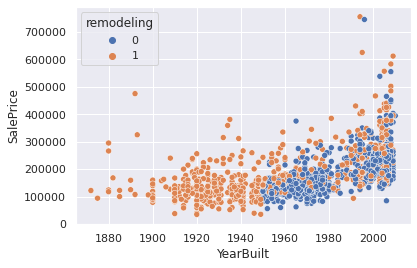

In [ ]:
# YearRemodAdd와 YearBuilt를 이용하여 remodeling의 여부를 파악해보자.
train['remodeling'] = 0
for i in train.index:
    if train.loc[i,'YearBuilt'] == train.loc[i,'YearRemodAdd']:
        train.loc[i,'remodeling'] = 0
    else:
        train.loc[i,'remodeling'] = 1

# 1940년도에 지어진 건물은 거의다 remodeling을 했다.
sns.scatterplot(data = train, x = 'YearBuilt', y = 'SalePrice', hue = 'remodeling')

Text(0.5, 1.0, 'non remodeling')

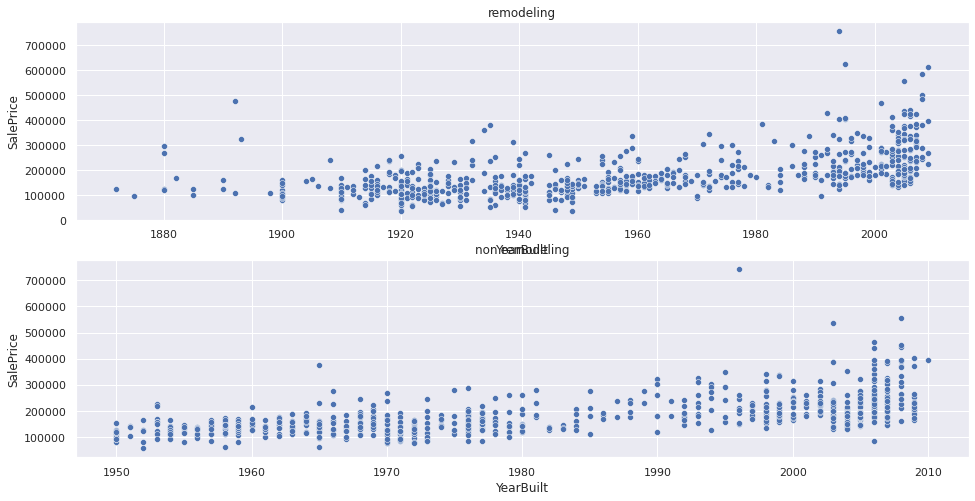

In [ ]:
# 리모델링을 했는지의 여부에 따라서 YearBuilt가 달라지는지 확인해보자.
train_remodeling_1 = train[train['remodeling'] == 1]
train_remodeling_0 = train[train['remodeling'] == 0]

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.scatterplot(data = train_remodeling_1, x = 'YearBuilt', y = 'SalePrice', ax = ax[0])
ax[0].set_title('remodeling')

sns.scatterplot(data = train_remodeling_0, x = 'YearBuilt', y = 'SalePrice', color = 'b',ax =ax [1])
ax[1].set_title('non remodeling')

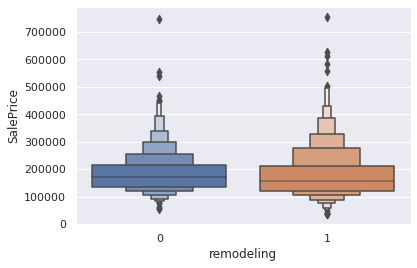

In [ ]:
# boxenplot을 이용하여 리모델링 여부가 가격에 영향을 미치는지 확인해보자.
sns.boxenplot(data = train, x = 'remodeling', y = 'SalePrice')

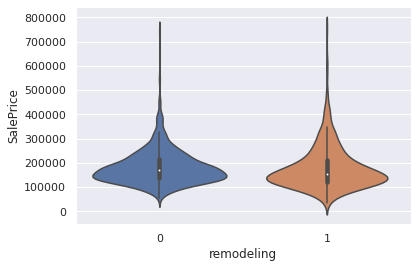

In [ ]:
sns.violinplot(data=train, x='remodeling',y = 'SalePrice')

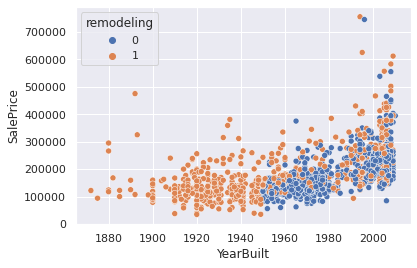

In [ ]:
# 우리는 리모델링이 어떻게 데이터가 형성되어있는지 확인해보자.
sns.scatterplot(data = train, x = 'YearBuilt', y = 'SalePrice', hue = 'remodeling')

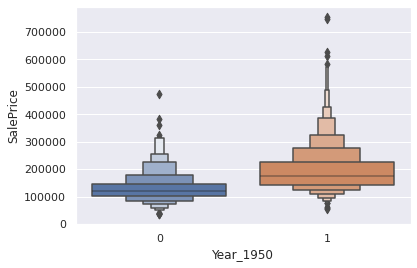

In [ ]:
# 1950년 이하의 집은 리모델링을 전부 해줬기 때문에 우리는 1950년도 이상 이하를 이용하여 Year_1950이라는 변수를 만들어주도록 하자.ㅏ
train['Year_1950'] = train['YearBuilt'].apply(lambda x: 1 if x >= 1950 else 0)
sns.boxenplot(data = train, x = 'Year_1950', y = 'SalePrice')

- 확실히 1950년도 이전의 건물과 이후의 건물은 가격면에서 차이가 있다.
- 그러면 우리는 데이터를 범주화 해주도록 하자.
- 1950년 이전의 건물을 0
- 1950년 이후의 건물 중 리모델링을 안한 건물 1
- 1950년 이후에 건물 중 리모델링을 한 건물 2

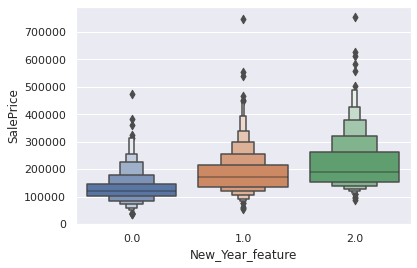

In [ ]:
# 확실히 1950년도 이전의 건물과 이후의 건물이 가격면에서 차이가 있었고 remodeling의 변화를 파악하기 위해서 우리는 New_Year_feature라는 변수를 만들어 주도록 하자.
# 1. 1950년 이전의 건물을 0
# 2. 1950년 이후의 건물 중 리모델링을 안한 건물 1
# 3. 1950년 이후에 건물 중 리모델링을 한 건물 2
train['New_Year_feature'] = np.nan
for i in train.index:
    # 처음에 1950년도 이전의 건물을 뽑아내서 0을 할당한다.
    if train.loc[i,'Year_1950'] == 0:
        train.loc[i,'New_Year_feature'] = 0
    else:
    # 1950년도 이상의 건물중에서 remodeling 값이 0이면 1 1이면 2를 할당한다.
        if train.loc[i,'remodeling'] == 0:
            train.loc[i,'New_Year_feature'] = 1
        else:
            train.loc[i,'New_Year_feature'] = 2
            
sns.boxenplot(data = train, x = 'New_Year_feature', y = 'SalePrice')
# 이 변수는 각 값마다 확연한 차이가 있으므로 변수에 넣기로 했다.

BsmtBath_counts의 값 : [1. 0. 2. 3.]
Bath_counts의 값 : [3. 2. 1. 4. 0.]


Text(0.5, 1.0, 'Bath_counts vs SalePrice')

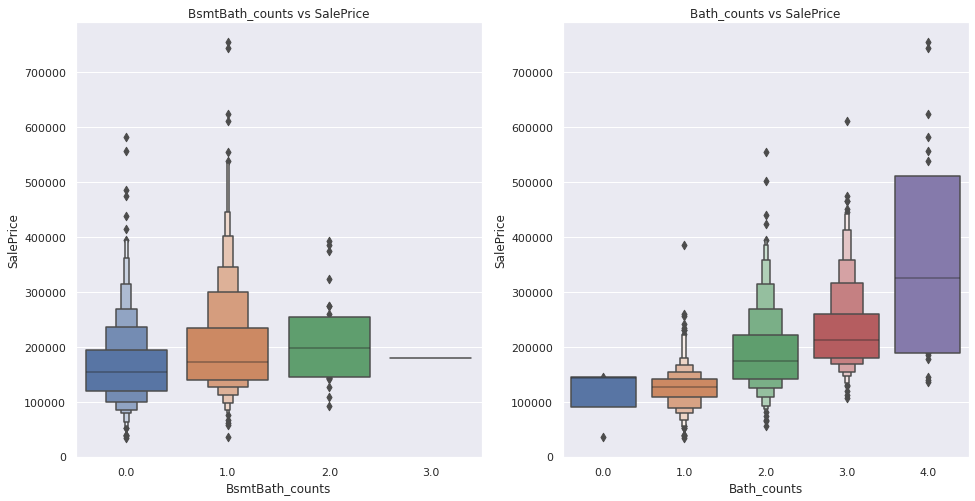

In [ ]:
# 지하 화장실의 갯수를 BsmtBath_counts라는 변수로 만들어준다.
# 화장실의 갯수를 Bath_counts라는 변수로 만들어준다.
for i in train.index:
    train.loc[i,'BsmtBath_counts'] = train.loc[i,'BsmtFullBath']+train.loc[i,'BsmtHalfBath']
    train.loc[i,'Bath_counts'] = train.loc[i,'FullBath'] + train.loc[i,'HalfBath']

# 화장실의 갯수를 만든 변수들을 지워준다.
train = train.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'], axis = 1)

# 변수들을 확인한다.
print('BsmtBath_counts의 값 :',train['BsmtBath_counts'].unique())
print('Bath_counts의 값 :', train['Bath_counts'].unique())

# boxenplot으로 SalePrice와의 관계를 확인한다.
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(data = train, x = 'BsmtBath_counts', y = 'SalePrice', ax = ax[0])
ax[0].set_title('BsmtBath_counts vs SalePrice')

sns.boxenplot(data = train, x = 'Bath_counts', y = 'SalePrice', ax = ax[1])
ax[1].set_title('Bath_counts vs SalePrice')

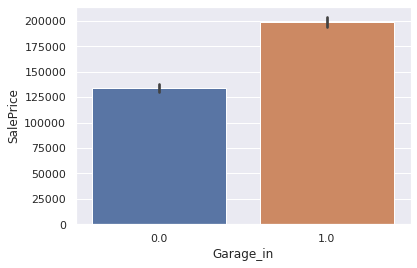

In [ ]:
# CarPort와 Detchd는 집과 떨어진 주차장임으로 이것을 제외한 나머지는 Garage_in이라는 변수를 만들어주자.
train.loc[(train['GarageType'] != 'Detchd')& (train['GarageType'] != 'CarPort'),'Garage_in'] = 1
train.loc[(train['GarageType'] == 'Detchd')|(train['GarageType'] == 'CarPort'), 'Garage_in'] = 0

# 그래프를 그려보면 Garage가 집 안에 있는 경우가 더 많은 SalePrice를 갖는다.
sns.barplot(data = train, x = 'Garage_in', y = 'SalePrice')

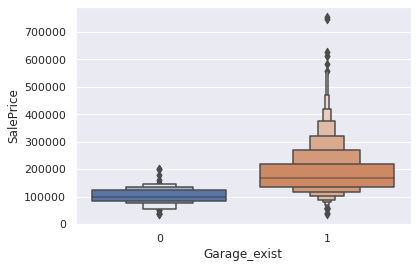

In [ ]:
# Garage가 있을 때와 없을 때의 가격을 비교하기 위해 Garage_exist라는 변수를 만들어 준다.
train['Garage_exist'] = train['GarageYrBlt'].apply(lambda x:1 if x > 0 else 0)

sns.boxenplot(data = train, x = 'Garage_exist', y = 'SalePrice')

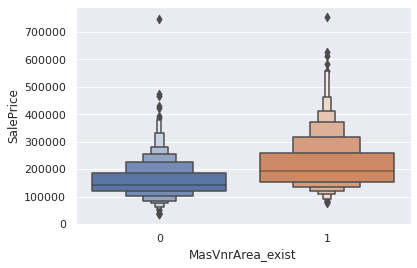

In [ ]:
# MasVnrArea를 가지고 있는지 없는지로 변수를 만들어 준다.
train['MasVnrArea_exist'] = train['MasVnrArea'].apply(lambda x:1 if x > 0 else 0)
train=train.drop('MasVnrArea', axis = 1)

sns.boxenplot(data = train, x = 'MasVnrArea_exist', y = 'SalePrice')

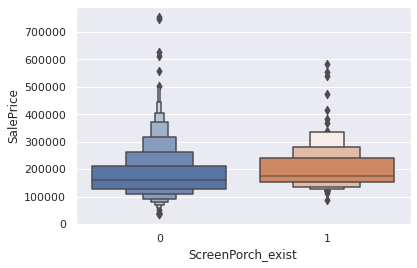

In [ ]:
# ScreenPorch가 존재하는 것과 존재하지 않는 것으로 나눠준다.
train['ScreenPorch_exist'] = train['ScreenPorch'].apply(lambda x:1 if x > 0 else 0)
sns.boxenplot(data = train, x = 'ScreenPorch_exist', y = 'SalePrice')
# ScreenPorch가 1인 데이터가 더 높은 가격을 형성하는 것을 볼 수 있다.
train=train.drop('ScreenPorch', axis = 1)

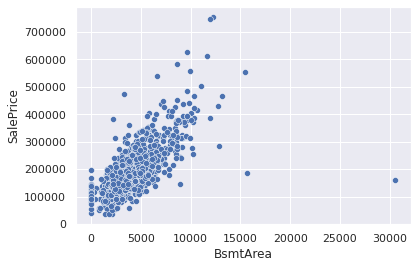

In [ ]:
# 지하실의 높이와 지하 총 평방피트를 곱해서 BsmtArea라는 지하의 부피를 구해준다.
for i in train.index:
    train.loc[i,'BsmtArea'] = train.loc[i,'BsmtQual'] * train.loc[i,'TotalBsmtSF']
    
# 그래프를 그려서 관계가 있는지 확인한다.
sns.scatterplot(data = train, x = 'BsmtArea', y = 'SalePrice')

# 다중공선성이 걸리지 않게 변수를 제거해 준다.
train=train.drop(['BsmtQual','TotalBsmtSF'], axis =1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# object인 column만 뽑아서 라벨 인코딩을 진행해 준다.
a = []
for i in train.columns:
    if train[i].dtype == 'object':
        a.append(i)
        
le = LabelEncoder()
for i in a:
    train[i] = le.fit_transform(train[i])

In [ ]:
# 필요하지 않은 변수들이라고 생각되는 변수들을 제거해준다.
train = train.drop(['remodeling','YearRemodAdd','Year_1950','Id'], axis = 1)
train = train.drop(['Exterior1st','Exterior2nd'], axis = 1)
train = train.drop(['GarageCars','Alley'], axis = 1)
train = train.drop(['Condition1','Condition2'], axis = 1)
train = train.drop('Utilities', axis = 1)

# 이상치가 너무 많은 데이터임으로 정규화를 통해서 분석에 용이하게 만든다.
train['SalePrice'] = train['SalePrice'].apply(lambda x: np.log1p(x))

# 연속형 변수들에 로그화 해준다.
train['LotArea'] = train['LotArea'].apply(lambda x:np.log1p(x))
train['GarageArea'] = train['GarageArea'].apply(lambda x:np.log1p(x))
train['GrLivArea'] = train['GrLivArea'].apply(lambda x:np.log1p(x))
train['LotFrontage'] = train['LotFrontage'].apply(lambda x: np.log1p(x))
train['BsmtArea'] = train['BsmtArea'].apply(lambda x: np.log1p(x))

# quality데이터를 각 값에 범주화 되어있는 개수를 나눠준다. 즉, quality데이터를 가지고 하나의 변수를 만들어준다.
quality_data=['OverallQual','ExterQual','KitchenQual','FireplaceQu','GarageQual']
train['quality'] = 0
for i in quality_data:
    train['quality'] += train[i].apply(lambda x: x/len(train[i].unique()))
    train=train.drop(i,axis = 1)

           quality  SalePrice
quality    1.00000    0.82022
SalePrice  0.82022    1.00000


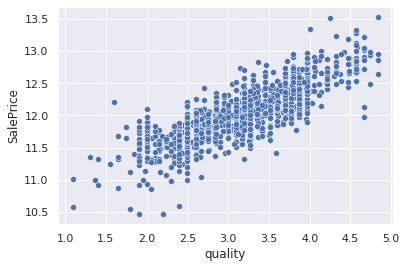

In [ ]:
# quality 변수와 SalePrice의 상관관계를 확인해 본다.
sns.scatterplot(data = train, x = 'quality', y = 'SalePrice')
print(train[['quality','SalePrice']].corr())

In [ ]:
# 변수가 모델에 넣을 수 있도록 int나 float으로 바뀌었는지 확인한다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSSubClass         1460 non-null   int64  
 1   MSZoning           1460 non-null   int64  
 2   LotFrontage        1460 non-null   float64
 3   LotArea            1460 non-null   float64
 4   Street             1460 non-null   int64  
 5   LotShape           1460 non-null   int64  
 6   LandContour        1460 non-null   int64  
 7   LotConfig          1460 non-null   int64  
 8   LandSlope          1460 non-null   int64  
 9   Neighborhood       1460 non-null   int64  
 10  BldgType           1460 non-null   int64  
 11  HouseStyle         1460 non-null   int64  
 12  OverallCond        1460 non-null   int64  
 13  YearBuilt          1460 non-null   int64  
 14  RoofStyle          1460 non-null   int64  
 15  RoofMatl           1460 non-null   int64  
 16  MasVnrType         1460 

In [ ]:
# train과 target변수로 바꾸어서 모델에 넣을 준비를 한다.
target=train.loc[:,'SalePrice']
train = train.drop('SalePrice', axis = 1)

 - 데이터 중요 feature 추출

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.model_selection import StratifiedKFold as stk
from sklearn.metrics import mean_squared_error

In [ ]:
# 변수를 train과 test셋으로 나누어서 LinearRegression으로 확인한다.
X_train, X_test, y_train,y_test = train_test_split(train,target, test_size = 0.2, random_state = 42)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

RMSE=mean_squared_error(y_pred, y_test)**0.5
print('LinearRegression :', RMSE)

LinearRegression : 0.14454304257261


In [ ]:
# 중요 변수를 추출하기 위해서 statsmodels로 변수들의 P-value를 확인한다.
import statsmodels.api as sm

X = sm.add_constant(train)
y = target

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
results.pvalues

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:57:00   Log-Likelihood:                 879.96
No. Observations:                1460   AIC:                            -1618.
Df Residuals:                    1389   BIC:                            -1243.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.7824      5.69

const                8.586608e-02
MSSubClass           2.437043e-02
MSZoning             9.628690e-01
LotFrontage          5.343548e-01
LotArea              7.490140e-10
                         ...     
Garage_exist         7.987701e-01
MasVnrArea_exist     1.879386e-01
ScreenPorch_exist    1.264562e-03
BsmtArea             5.385298e-03
quality              6.990085e-34
Length: 71, dtype: float64

In [ ]:
# p-value가 0.05이상인 변수를 제거해 준다.
data_feature=pd.DataFrame(results.pvalues)
data_feature=data_feature.rename(columns = {0:'feature'})

a = []
for index,feature in zip(data_feature.index, data_feature['feature']):
    if feature > 0.05:
        pass
    else:
        if index != 'const':
            a.append(index)

In [ ]:
# 추출한 변수들을 data_feature에 저장한다.
data_feature=train[a]
data_feature.head()

,MSSubClass,LotArea,Street,Neighborhood,OverallCond,YearBuilt,Foundation,BsmtExposure,HeatingQC,CentralAir,2ndFlrSF,GrLivArea,KitchenAbvGr,Functional,Fireplaces,GarageArea,WoodDeckSF,SaleCondition,SameExterior,BsmtBath_counts,Bath_counts,ScreenPorch_exist,BsmtArea,quality
0,5,9.042040,1,5,5,2003,2,1,5,1,854,7.444833,1,6,0,6.308098,0,4,1.0,1.0,3.0,0,8.138857,3.200000
1,0,9.169623,1,24,8,1976,1,4,5,1,0,7.141245,1,6,1,6.133398,298,4,1.0,1.0,2.0,0,8.526945,3.100000
2,5,9.328212,1,5,5,2001,2,2,5,1,866,7.488294,1,6,1,6.411818,0,4,1.0,1.0,3.0,0,8.210940,3.700000
3,6,9.164401,1,6,5,1915,0,1,4,1,756,7.448916,1,6,1,6.466145,0,0,1.0,1.0,1.0,0,7.727094,3.616667
4,5,9.565284,1,15,5,2000,2,3,5,1,1053,7.695758,1,6,1,6.729824,192,4,1.0,1.0,3.0,0,8.429673,3.800000


In [ ]:
# 변수를 제거 한 이후에 다시 한번 LinearRegression으로 모델을 돌려본다.
X_train, X_test, y_train,y_test = train_test_split(data_feature,target, test_size = 0.2, random_state = 42)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

RMSE=mean_squared_error(y_pred, y_test)**0.5
print('LinearRegression :', RMSE)

LinearRegression : 0.14706892628511486


**p-value로 추출한 변수들로 다시 한번 전처리를 진행한다.**


In [ ]:
# 전처리를 진행하기 위해서 변수를 데이터프레임에 넣어준다.
data_feature=pd.concat([data_feature,target], axis = 1)

Text(0.5, 1.0, 'SalePrice distribution')

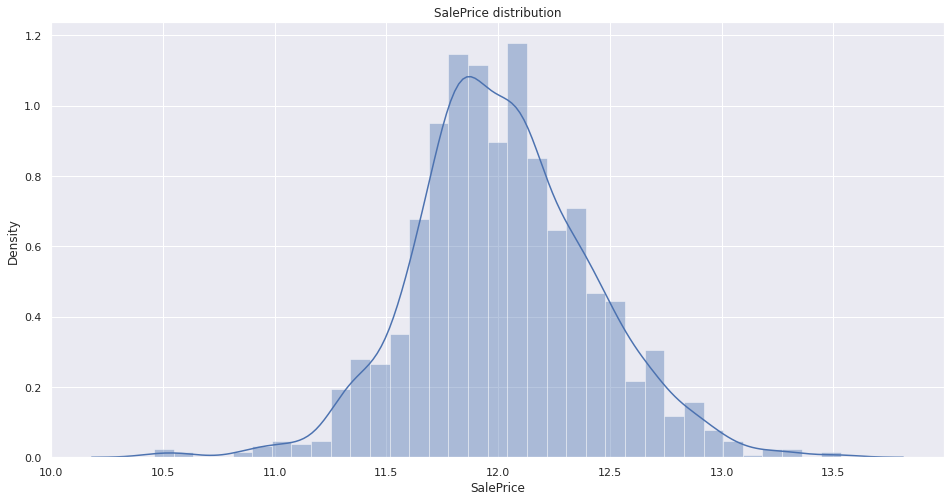

In [ ]:
# SalePrice의 분포를 확인한다.
plt.figure(figsize = (16,8))
sns.distplot(data_feature['SalePrice'])
plt.title('SalePrice distribution')

In [ ]:
# 결측치가 없는지 확인한다.
data_feature.isnull().sum()

MSSubClass           0
LotArea              0
Street               0
Neighborhood         0
OverallCond          0
YearBuilt            0
Foundation           0
BsmtExposure         0
HeatingQC            0
CentralAir           0
2ndFlrSF             0
GrLivArea            0
KitchenAbvGr         0
Functional           0
Fireplaces           0
GarageArea           0
WoodDeckSF           0
SaleCondition        0
SameExterior         0
BsmtBath_counts      0
Bath_counts          0
ScreenPorch_exist    0
BsmtArea             0
quality              0
SalePrice            0
dtype: int64

**두개의 변수로 찾아보기**

In [ ]:
data_feature.columns
data_feature['New_Year_feature'] = train['New_Year_feature']

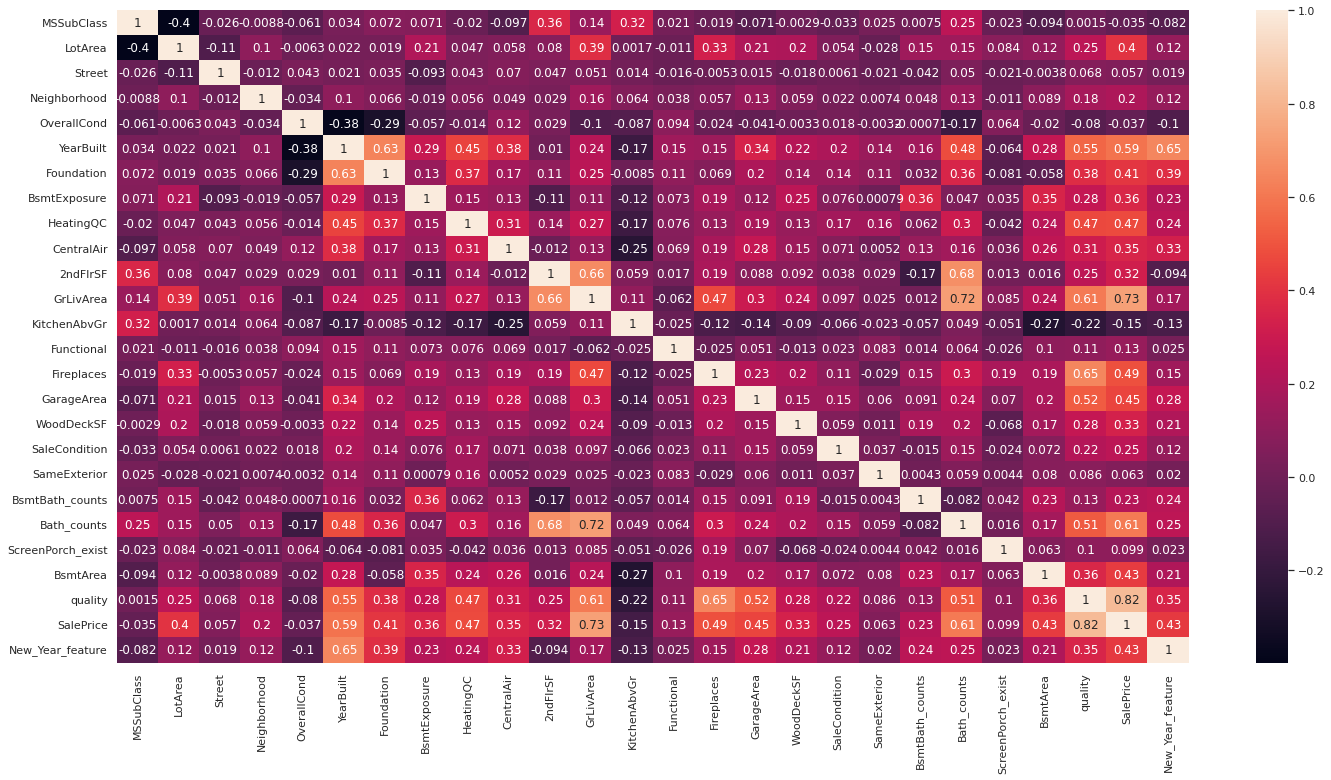

In [ ]:
plt.figure(figsize = (24,12))
data_feature_corr=data_feature.corr()
sns.heatmap(data_feature_corr, annot = True)

**다중공산성 확인해보기**

In [ ]:
import statsmodels.api as sm

X = sm.add_constant(data_feature.drop('SalePrice', axis = 1))
y = data_feature['SalePrice']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     418.0
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:57:03   Log-Likelihood:                 812.39
No. Observations:                1460   AIC:                            -1573.
Df Residuals:                    1434   BIC:                            -1435.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0729      0.60

**VIF 를 사용한 다중공선성의 진단과 판단기준**

다중공선성을 판단하기 위해 VIF 가 가장 많이 사용된다. VIF 수식의 값이 10 이상 이면 해당 변수가 다중공선성이 존재하는 것으로 판단한다. (반대로, 1 에서 10 미만의 값이면 다중공선성이 별 문제가 되지 않는 것으로 판단한다. 참고로 VIF 값은 1에서 무한대의 값의 범위를 갖는다.)

다중공선성을 SPSS 프로그램을 사용하여 측정할 수 있다. 만약, SPSS 에서 다중공선성(VIF, Tolerance, CN) 을 계산하는 방법을 알고 싶다면 여기 를 클릭하면 설명을 볼 수 있다.

VIF 수식의 의미는 아래에 자세하게 설명하였다.

출처: https://ai-times.tistory.com/89 [ai-times]

In [ ]:
# VIF를 이용하여 다중공선성을 확인해주려고 했지만 VIF Factor가 높은 변수들은 필요하다고 판단해서 제거하지 않기로 했다.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data_feature.drop('SalePrice', axis = 1).values, i) for i in range(data_feature.drop('SalePrice',axis = 1).shape[1])]
vif['features'] = data_feature.drop('SalePrice',axis =1).columns
vif

,VIF Factor,features
0,3.923086,MSSubClass
1,593.018213,LotArea
2,253.698802,Street
3,5.599491,Neighborhood
4,32.182641,OverallCond
5,1739.103817,YearBuilt
6,8.544600,Foundation
7,5.030274,BsmtExposure
8,30.823799,HeatingQC
9,21.176579,CentralAir


Text(0.5, 1.0, 'LotArea vs SalePrice')

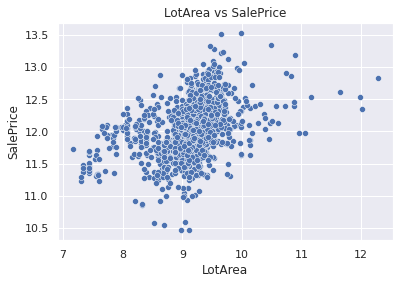

In [ ]:
# LotArea와 SalePrice를 비교해본다.
sns.scatterplot(data = data_feature, x = 'LotArea', y = 'SalePrice')
plt.title('LotArea vs SalePrice')

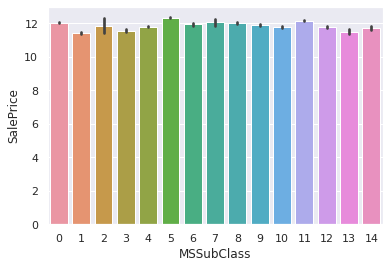

In [ ]:
# MSSubClass와 SalePrice를 비교해본다.
sns.barplot(data = data_feature, x = 'MSSubClass', y = 'SalePrice')

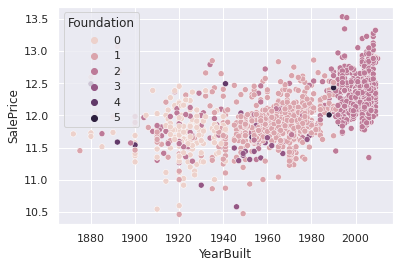

In [ ]:
# YearBuilt와 SalePrice를 Foundation별로 비교해 본다.
sns.scatterplot(data = data_feature, x = 'YearBuilt', y = 'SalePrice', hue = 'Foundation')

# YearBuilt 1940년 이전 1940~1990사이 1990 이상 의 데이터들은 각 Foundation을 대표한다고 판단했고 년도별로 나눠주었다.
# YearBuilt를 Foundation을 기준으로 잘라준다.
data_feature.loc[data_feature['YearBuilt'] <= 1940,'Year_Foundation']  = 0
data_feature.loc[(data_feature['YearBuilt'] >= 1940) &(data_feature['YearBuilt'] < 1990), 'Year_Foundation'] = 1
data_feature.loc[(data_feature['YearBuilt'] >= 1990) , 'Year_Foundation'] = 2
data_feature=data_feature.drop('Foundation', axis = 1)

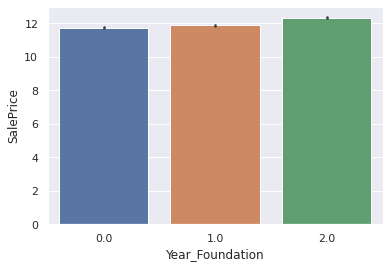

In [ ]:
# Year_Foundattion과 SalePrice를 비교해준다.
sns.barplot(data = data_feature, x = 'Year_Foundation', y = 'SalePrice')

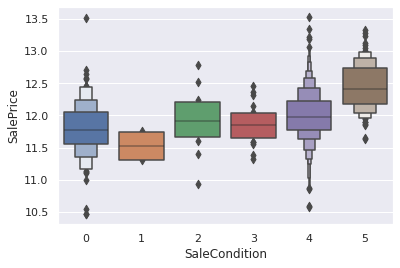

In [ ]:
# SaleCondition과 SalePrice를 비교해준다.
sns.boxenplot(data = data_feature, x = 'SaleCondition', y = 'SalePrice')

# 특징을 발견하지 못해서 지워주도록 하자.

**2ndFlrSF**

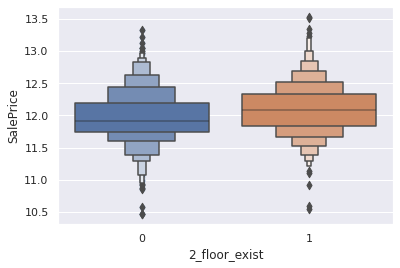

In [ ]:

# 2ndFlrSF와 SalePrice를 비교해준다.
sns.scatterplot(data = data_feature, x = '2ndFlrSF',y = 'SalePrice')

# 0에 몰려있는 데이터가 많기 때문에 2층이 있으면 1 없으면 0으로 바꿔준다.
data_feature['2_floor_exist'] = data_feature['2ndFlrSF'].apply(lambda x:1 if x >0  else 0)

# 1과 0 사이에 차이가 있다.
sns.boxenplot(data = data_feature, x = '2_floor_exist', y = 'SalePrice')

# 다중공선성을 피하기 위해서 변수를 제거해 준다.
data_feature = data_feature.drop('2ndFlrSF', axis = 1)

**KitchenAbvGr**

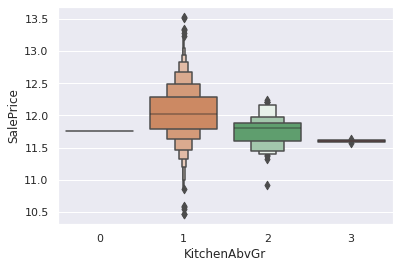

In [ ]:
# KitchenAbvGr과 SalePrice를 비교해준다.
sns.boxenplot(data = data_feature, x = 'KitchenAbvGr', y = 'SalePrice')

# 특징이 있는 변수라고 판단되지 않았고 변수를 제거해 주도록 하자.
data_feature=data_feature.drop('KitchenAbvGr', axis = 1)

**HeatingQC**

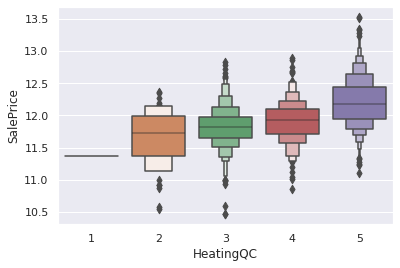

In [ ]:
# HeatingQC와 SalePrice를 비교해준다.
# HeatingQC가 올라갈수록 높은 가격을 형성함으로 지워주지 않도록 한다.
sns.boxenplot(data = data_feature, x = 'HeatingQC', y = 'SalePrice')

**FirePlaces**

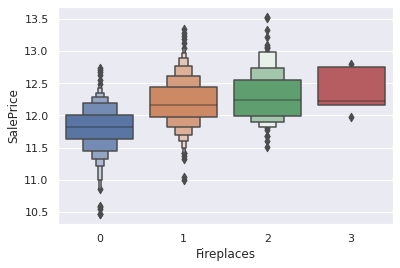

In [ ]:
# FirePlaces와 SalePrice를 비교해준다.
# Fireplaces의 값이 올라갈수록 높은 SalePrice를 갖는다.
sns.boxenplot(data = data_feature, x = 'Fireplaces', y = 'SalePrice')

**Stacking ensemble을 사용한 모델링**

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 37 kB/s 


**Huber Resgression 참고**

https://m.blog.naver.com/sw4r/221266041922

In [ ]:
from sklearn.linear_model import Ridge,Lasso,HuberRegressor,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models=[LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),CatBoostRegressor()]
final_model = XGBRegressor()
def stacking_ensemble(models, data = None, target = None, test_size = 0.2,
                      n_folds = 5, final_model = final_model):
    # kfold를 사용한다.
    kfold = KFold(n_splits = n_folds)
    
    # 데이터를 train데이터와 test 데이터로 나누어준다.
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = test_size, random_state = 100)
    
    # 각 모델의 평균값을 넣어주기 위해서 공간을 만든다.
    final_train_predict = np.zeros((X_train.shape[0], len(models)))
    final_test_predict = np.zeros((X_test.shape[0], len(models)))
    
    for model_count, model in enumerate(models):
        
        # 각 모델마다 k_fold의 값들을 넣어주기 위해서 공간을 만든다.
        test_predict = np.zeros((X_test.shape[0], n_folds))
        
        # X_train의 데이터를 train과 valid로 나누기 
        for fold_count, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):
            X_train_n = X_train.iloc[train_idx]
            y_train_n = y_train.iloc[train_idx]
            X_test_n = X_train.iloc[valid_idx]
        
            # 개별 모델을 학습한다.
            model = model.fit(X_train_n, y_train_n)
            final_train_predict[valid_idx, model_count] = model.predict(X_test_n)
            test_predict[:, fold_count] = model.predict(X_test)
            
        # 교차검증을 한 데이터를 가지고 평균 구하기    
        final_test_predict[:,model_count] = np.mean(test_predict, axis = 1)
                
    # 최종 모델로 학습시키기
    final_model = final_model.fit(final_train_predict, y_train)
    y_pred = final_model.predict(final_test_predict)
    
    # RMSE값 반환하기
    test_rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(test_rmse)

In [ ]:
stacking_ensemble(models, data = data_feature.drop('SalePrice', axis = 1),
                  target = data_feature['SalePrice'])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6:	learn: 0.3308363	total: 63.6ms	remaining: 9.02s
7:	learn: 0.3229070	total: 65.5ms	remaining: 8.12s
8:	learn: 0.3149211	total: 67.5ms	remaining: 7.43s
9:	learn: 0.3075520	total: 69.4ms	remaining: 6.87s
10:	learn: 0.3006619	total: 71.2ms	remaining: 6.4s
11:	learn: 0.2936669	total: 72.9ms	remaining: 6s
12:	learn: 0.2872609	total: 74.7ms	remaining: 5.67s
13:	learn: 0.2809715	total: 76.4ms	remaining: 5.38s
14:	learn: 0.2749313	total: 78.3ms	remaining: 5.14s
15:	learn: 0.2690515	total: 80ms	remaining: 4.92s
16:	learn: 0.2631723	total: 81.8ms	remaining: 4.73s
17:	learn: 0.2581209	total: 83.6ms	remaining: 4.56s
18:	learn: 0.2532793	total: 85.4ms	remaining: 4.41s
19:	learn: 0.2479618	total: 87.1ms	remaining: 4.27s
20:	learn: 0.2431219	total: 88.9ms	remaining: 4.14s
21:	learn: 0.2382961	total: 90.7ms	remaining: 4.03s
22:	learn: 0.2343826	total: 92.5ms	remaining: 3.93s
23:	learn: 0.2300334	total: 94.3ms	remaining: 3.84s
24:	learn: 0.2255672	total: 96.1ms	rem

# iris_data 파라미터 최적화 방법

In [ ]:
#import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

#Loading iris dataset from sklearn
iris = load_iris()

#independent feautres
X = iris.data

# target features
y = iris.target

In [ ]:
#import XGboost
from xgboost import XGBClassifier

#Defining XGB Classification model
clf = XGBClassifier()

# 1.Grid SearchCV
- 사용자가 하이퍼 파라미터마다 몇가지 값을 가진 리스트를 입력하면, 가능한 하이퍼 파라미터의 경우의 수마다 예측 성능을 측정하여 사용자가 일일이 하이퍼 파라미터를 설정하고, 예측 성능을 비교하여 최적의 파라미터를 찾는 수고를 줄이고 이 과정을 한꺼번에 진행한다.

In [ ]:
#Importing packages from sklearn

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]    
}

#declaring GridSearchCV model

model = model_selection.GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5    
)

#fitting values to the gridsearchcv model

model.fit(X,y)
#printing the best possible values to enhance accuracy
print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.933, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=0.933, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.01, score=1.000, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.1 ...................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.1, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimat

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=0.933, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=0.933, total=   0.0s
[CV] max_depth=1, n_estimators=100, reg_lambda=0.5 ...................
[CV]  max_depth=1, n_estimators=100, reg_lambda=0.5, score=1.000, total=   0.0s
[CV] max_depth=1, n_estimators=200, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=200, reg_lambda=0.01, score=0.967, total=   0.0s
[CV] max_depth=1, n_estimators=200, reg_lambda=0.01 ..................
[CV]  max_depth=1, n_estimators=200, reg_lambda=0.01, score=0.967, total=   0.0s
[CV] max_dep

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   11.6s finished


# 2. RandomizedSearchCV

-그리드 서치에서는 grid_param과 같이 매개변수마다 특정 값을 지정해주었습니다. 만약에 변수 범위가 너무 다양하다면 하나하나 작성해주는게 너무 힘들다.

- 하이퍼 파라미터 검색 반영이 너무 클때 사용하는 방식이 Randomized Search입니다.


In [ ]:
#defining a set of values as a dictionary for hyperparameters

param_grid = {
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]    
}

#declaring RandomizedSearchCV model

model = model_selection.RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5,
    n_iter=10
)

#fitting values to the RandomizedSearchCV model

model.fit(X,y)

#printing the best possible values to enhance accuracy

print(model.best_params_)
print(model.best_estimator_)
#printing the best score
print(model.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.967, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.967, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.933, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s


[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=0.933, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=5 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=5, score=1.000, total=   0.0s
[CV] reg_lambda=0.01, n_estimators=100, max_depth=3 ..................
[CV]  reg_lambda=0.01, n_estimators=100, max_depth=3, score=0.967, total=   0.0s
[CV] reg_lambda=0.01, n_estimators=100, max_depth=3 ..................
[CV]  reg_lambda=0.01, n_estimators=100, max_depth=3, score=0.967, total=   0.0s
[CV] reg_lambda=0.01, n_estimators=100, max_depth=3 ..................
[CV]  reg_lambda=0.01, n_estimators=100, max_depth=3, score=0.933, total=   0.0s
[CV] reg_lambda=0.01, n_estimators=100, max_depth=3 ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


[CV]  reg_lambda=0.01, n_estimators=100, max_depth=3, score=0.933, total=   0.0s
[CV] reg_lambda=0.01, n_estimators=100, max_depth=3 ..................
[CV]  reg_lambda=0.01, n_estimators=100, max_depth=3, score=1.000, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=3 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=3, score=0.967, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=3 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=3, score=0.967, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=3 ...................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s


[CV]  reg_lambda=0.1, n_estimators=100, max_depth=3, score=0.933, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=3 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=3, score=0.933, total=   0.0s
[CV] reg_lambda=0.1, n_estimators=100, max_depth=3 ...................
[CV]  reg_lambda=0.1, n_estimators=100, max_depth=3, score=1.000, total=   0.0s
[CV] reg_lambda=0.5, n_estimators=300, max_depth=1 ...................
[CV]  reg_lambda=0.5, n_estimators=300, max_depth=1, score=0.967, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=300, max_depth=1 ...................
[CV]  reg_lambda=0.5, n_estimators=300, max_depth=1, score=0.967, total=   0.1s
[CV] reg_lambda=0.5, n_estimators=300, max_depth=1 ...................
[CV]  reg_lambda=0.5, n_estimators=300, max_depth=1, score=0.933, total=   0.0s
[CV] reg_lambda=0.5, n_estimators=300, max_depth=1 ...................
[CV]  reg_lambda=0.5, n_estimators=300, max_depth=1, score=0.933, total=   0.0s
[CV] reg_lambd

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished


## 3. Bayesian optimization

Bayesian Optimization 은 어느 입력값(x)를 받는 미지의 목적 함수(f(x))를 상정하여,

해당 함숫값(f(x))을 최대로 만드는 최적해를 찾는 것을 목적으로 합니다.

즉, 목적 함수(탐색대상함수)와 하이퍼파라미터 쌍(pair)을 대상으로 Surrogate Model(대체 모델) 을 만들고,
순차적으로 하이퍼 파라미터를 업데이트해 가면서 평가를 통해 최적의 하이퍼파라미터 조합을 탐색합니다.
이 때의 목점 함수를 black-box function 이라고 합니다.
Bayesian Optimization 에는 두 가지 필수 요소가 존재합니다.

먼저 Surrogate Model 은, 현재까지 조사된 입력값-함숫결과값 점들 (x1, f(x1)),...,(xt, f(xt)) 을 바탕으로, 미지의 목적 함수의 형태에 대한 확률적인 추정을 수행하는 모델을 지칭합니다. 그리고 Acquisition Function 은, 목적 함수에 대한 현재까지의 확률적 추정 결과를 바탕으로, ‘최적 입력값을 찾는 데 있어 가장 유용할 만한’ 다음 입력값 후보를 추천해 주는 함수를 지칭합니다.

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb33tsP%2FbtraMpvxJG0%2FSn7uQK7k910IQ7cP3ZM9vk%2Fimg.png'>

- 대략적인 수행 과정

  - 위의 파란색 선은, 우리가 찾으려고 하는 목적함수 f(x) 를 나타내고,
검정색 점선은, 지금까지 관측한 데이터를 바탕으로 우리가 예측한 estimated function 을 의미합니다.

  - 검정색 점선 주변에 있는 파란 영역은, 목적함수 f(x) 가 존재할만한 confidence bound(function의 variance) 를 의미합니다.

  - 밑에 있는 EI(x) 는, Acquisition function 을 의미하며, 다음 입력값 후보 추천 시 사용됩니다.

  - Acquisition function 값이 컸던 지점을 확인하고, 해당 지점의 hyperparameter 를 다음 입력 값으로 사용합니다.
  - hyperparamter 에 따라 estimated function 을 계속 update 하면, estimation function 과 목적 함수 f(x) 가 흡사해집니다. 관측한 지점 중 best point 을 argmax f(x) 로 선택합니다.

- 자세한 수행 과정

 1. 입력값, 목적 함수 및 그 외 설정값들을 정의합니다.

  1. 입력값 x : 여러가지 hyperparameter

  2. 목적 함수 f(x) : 설정한 입력값을 적용해 학습한, 딥러닝 모델의 성능 결과 수치(e.g. 정확도)
  3. 입력값 x 의 탐색 대상 구간 : (a,b)
  
  4. 입력값-함숫결과값 점들의 갯수 : n

  5. 조사할 입력값-함숫결과값 점들의 갯수 : N

- 설정한 탐색 대상 구간 (a,b) 내에서 처음 n 개의 입력값들을 랜덤하게 샘플링하여 선택합니다.

- 선택한 n 개의 입력값 x1, x2, ..., xn 을 각각 모델의 hyperparameter 로 설정하여 딥러닝 모델을 학습한 뒤, 학습이 완료된 모델의 성능 결과 수치를 계산합니다.

  - 이들을 각각 함숫결과값 f(x1), f(x2), ..., f(xn) 으로 간주합니다.
입력값-함숫결과값 점들의 모음 (x1, f(x1)), (x2, f(x2)), ..., (xn, f(xn)) 에 대하여 Surrogate Model 로 확률적 추정을 수행합니다.

- 조사된 입력값-함숫결과값 점들이 총 N 개에 도달할 때까지, 아래의 과정을 반복적으로 수행합니다.

  - 기존 입력값-함숫결과값 점들의 모음 (x1, f(x1)),(x2, f(x2)), ..., (xt, f(xt)) 에 대한 Surrogate Model 의 확률적 추정 결과를 바탕으로, 입력값 구간 (a,b) 내에서의 EI 의 값을 계산하고, 그 값이 가장 큰 점을 다음 입력값 후보 x1 로 선정합니다.

  - 다음 입력값 후보 x1 를 hyperparameter 로 설정하여 딥러닝 모델을 학습한 뒤, 학습이 완료된 모델의 성능 결과 수치를 계산하고, 이를 f(x1) 값으로 간주합니다.

  - 새로운 점 (x2, f(x2)) 을 기존 입력값-함숫결과값 점들의 모음에 추가하고, 갱신된 점들의 모음에 대하여 Surrogate Model 로 확률적 추정을 다시 수행합니다.


- 총 N 개의 입력값-함숫결과값 점들에 대하여 확률적으로 추정된 목적 함수 결과물을 바탕으로, 평균 함수 μ(x) 을 최대로 만드는 최적해를 최종 선택합니다. 추후 해당값을 hyperparameter 로 사용하여 딥러닝 모델을 학습하면, 일반화 성능이 극대화된 모델을 얻을 수 있습니다.

In [ ]:
def black_box_function(x, y):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
    return -x ** 2 - (y - 1) ** 2 + 1

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=e08bf56596717188cd45c8532355f6f77ba06a54a1cac7ca3ed19c25fb4b3f6c
  Stored in directory: /root/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {'x': (2, 4), 'y': (-3, 3)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    random_state=1,
)

- n_iter: How many steps of bayesian optimization you want to perform. The more steps the more likely to find a good maximum you are.

- init_points: How many steps of random exploration you want to perform. Random exploration can help by diversifying the exploration space.

In [ ]:
optimizer.maximize(
    init_points=2,
    n_iter=3,
)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        | -7.135    |  2.834    |  1.322    |
|  2        | -7.78     |  2.0      | -1.186    |
|  3        | -7.11     |  2.218    | -0.7867   |
|  4        | -11.09    |  3.288    | -0.1305   |
|  5        | -4.335    |  2.299    |  0.7729   |


In [ ]:
print(optimizer.max)

{'target': -4.335211455389778, 'params': {'x': 2.298613426347459, 'y': 0.7728705840165757}}


In [ ]:
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

Iteration 0: 
	{'target': -7.135455292718879, 'params': {'x': 2.8340440094051482, 'y': 1.3219469606529488}}
Iteration 1: 
	{'target': -7.779531005607566, 'params': {'x': 2.0002287496346898, 'y': -1.1860045642089614}}
Iteration 2: 
	{'target': -7.109925819441113, 'params': {'x': 2.2175526295255183, 'y': -0.7867249801593896}}
Iteration 3: 
	{'target': -11.086343793914041, 'params': {'x': 3.287585840299017, 'y': -0.13054108133205314}}
Iteration 4: 
	{'target': -4.335211455389778, 'params': {'x': 2.298613426347459, 'y': 0.7728705840165757}}


In [ ]:
optimizer.set_bounds(new_bounds={"x": (-2, 3)})

optimizer.maximize(
    init_points=0,
    n_iter=5,
)


|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  6        | -1.769    | -1.57     |  1.552    |
|  7        | -1.51     | -1.518    |  1.455    |
|  8        | -1.083    | -1.343    |  1.529    |
|  9        | -0.4575   | -1.158    |  1.342    |
|  10       |  0.1189   | -0.8431   |  1.413    |


# 4.Hyperopt

- HyperOpt 는 하이퍼 파라미터 최적화를 위해 검색 공간 , 손실 함수 , 최적화 알고리즘 및 기록 ( 점수, 구성 ) 을 저장하기 위한 데이터베이스의 4 가지 필수 구성 요소가 필요합니다 . 검색 공간은 연속하고, 볼록 함수에 의해 결정될 것이다.

참고 : https://ichi.pro/ko/hyperopt-beijian-choejeoghwaleul-giban-eulo-han-haipeo-palamiteo-tyuning-140338828128041

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.9 MB/s 


In [ ]:
#importing packages 

from hyperopt import hp,fmin, tpe, Trials

from hyperopt.pyll.base import scope

from functools import partial

from skopt import space

from skopt import gp_minimize

#defining a method that will perfrom a 5 split cross validation over

#dataset and and will produce the optimum value of the accuracy

def optimize(params, x,y):

    clf = XGBClassifier(**params)

    kf = model_selection.StratifiedKFold(n_splits=5)

    accuracies = []

    for idx in kf.split(X=x,y=y):

        train_idx,test_idx = idx[0],idx[1]

        xtrain = x[train_idx]

        ytrain = y[train_idx]

        xtest = x[test_idx]

        ytest = y[test_idx]

        clf.fit(xtrain,ytrain)

        preds =  clf.predict(xtest)

        fold_acc = metrics.accuracy_score(ytest,preds)

        accuracies.append(fold_acc)

    return -1.0 * np.mean(accuracies)

#defining a set of values as hp for hyperparameters

param_space = {

    "max_depth" : scope.int(hp.quniform("max_depth",3,20, 1)) ,

    "min_child_weight" : scope.int(hp.quniform("min_child_weight",1,8, 1)),

    "n_estimators": scope.int(hp.quniform("n_estimators",100,1500,1)),

    'learning_rate': hp.uniform("learning_rate",0.01,1),

    'reg_lambda': hp.uniform("reg_lambda",0.01,1),

    'gamma': hp.uniform("gamma",0.01,1),

    'subsample': hp.uniform("subsample",0.01,1)

    }

#defiing optimization_fuction as partial and calling optimize within it

optimization_fuction = partial(optimize,x = X, y = y) 

trials = Trials()

#Getting the optimum values for hyperparameters

result = fmin(

    fn = optimization_fuction,

    space = param_space,

    algo = tpe.suggest,

    max_evals = 15,

    trials = trials

)

#Printing the best hyperparemeter set

print(result)

100%|██████████| 15/15 [00:11<00:00,  1.28it/s, best loss: -0.96]
{'gamma': 0.2825961968686159, 'learning_rate': 0.44014810907611035, 'max_depth': 11.0, 'min_child_weight': 1.0, 'n_estimators': 754.0, 'reg_lambda': 0.9804970453193712, 'subsample': 0.7436844600318553}


# 5. Optuna

참고 : https://rosypark.tistory.com/153

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 4.1 MB/s 
     |████████████████████████████████| 209 kB 61.3 MB/s 
     |████████████████████████████████| 80 kB 12.1 MB/s 
     |████████████████████████████████| 75 kB 5.7 MB/s 
     |████████████████████████████████| 49 kB 8.2 MB/s 
     |████████████████████████████████| 144 kB 42.3 MB/s 
     |████████████████████████████████| 112 kB 64.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ccca9e5de5bb306a4a574934fd1e350055c1560c2d322032436b697d19da2761
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
#importing packages

import optuna

from functools import partial

#defining a method that will perfrom a 5 split cross validation over

#dataset and and will produce the optimum value of the accuracy

def optimize(trial, x,y):

    #parameter set is declare within function

    reg_lambda = trial.suggest_uniform('reg_lambda',0.01,1)

    n_estimators = trial.suggest_int('n_estimators',100,1500)

    max_depth = trial.suggest_int('max_depth',3,15)

    max_features = trial.suggest_uniform('max_features',0.01,1)

    clf = XGBClassifier(

    n_estimators= n_estimators,

    reg_lambda=reg_lambda,

    max_depth=max_depth,

    max_features= max_features)

    kf = model_selection.StratifiedKFold(n_splits=5)

    accuracies = []

    for idx in kf.split(X=x,y=y):

        train_idx,test_idx = idx[0],idx[1]

        xtrain = x[train_idx]

        ytrain = y[train_idx]

        xtest = x[test_idx]

        ytest = y[test_idx]

        clf.fit(xtrain,ytrain)

        preds =  clf.predict(xtest)

        fold_acc = metrics.accuracy_score(ytest,preds)

        accuracies.append(fold_acc)

    return -1.0 * np.mean(accuracies)

#defiing optimization_fuction as partial and calling optimize within it

optimization_fuction = partial(optimize,x = X, y = y) 

study = optuna.create_study(direction='minimize')

#Printing the best hyperparemeter set

study.optimize(optimization_fuction, n_trials=15)

[I 2021-11-09 22:58:11,814] A new study created in memory with name: no-name-a7aa8120-0deb-4b19-9933-b81f02fc14c2
[I 2021-11-09 22:58:12,300] Trial 0 finished with value: -0.96 and parameters: {'reg_lambda': 0.9677732303877321, 'n_estimators': 521, 'max_depth': 6, 'max_features': 0.7780417229762776}. Best is trial 0 with value: -0.96.
[I 2021-11-09 22:58:12,828] Trial 1 finished with value: -0.96 and parameters: {'reg_lambda': 0.5980005626441917, 'n_estimators': 594, 'max_depth': 3, 'max_features': 0.82215862288479}. Best is trial 0 with value: -0.96.
[I 2021-11-09 22:58:13,445] Trial 2 finished with value: -0.96 and parameters: {'reg_lambda': 0.18319210144005188, 'n_estimators': 697, 'max_depth': 9, 'max_features': 0.5219640522804456}. Best is trial 0 with value: -0.96.
[I 2021-11-09 22:58:14,530] Trial 3 finished with value: -0.9666666666666668 and parameters: {'reg_lambda': 0.0794850194569884, 'n_estimators': 1277, 'max_depth': 12, 'max_features': 0.7899181342264401}. Best is trial 

# 6.Pycaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 266 kB 4.3 MB/s 
     |████████████████████████████████| 6.8 MB 57.5 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
     |████████████████████████████████| 261 kB 61.1 MB/s 
     |████████████████████████████████| 1.7 MB 65.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 53.1 MB/s 
     |████████████████████████████████| 113 kB 81.0 MB/s 
     |████████████████████████████████| 1.3 MB 33.1 MB/s 
     |████████████████████████████████| 56 kB 6.4 MB/s 
     |████████████████████████████████| 271 kB 82.1 MB/s 
     |████████████████████████████████| 2.0 MB 30.4 MB/s 
     |████████████████████████████████| 16.9 MB 82 kB/s 
     |████████████████████████████████| 303 kB 60.7 MB/s 
     |████████████████████████████████| 102 kB 16.2 MB/s 
     |███████████████████

In [ ]:
import optuna
import sklearn
from sklearn.model_selection import cross_val_score

# 1. 최소화/최대화할 목적함수 정의
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

# 2. trial object로 하이퍼파라미터 값 추천
# 다양한 분류모델을 설정해서 비교할 수 있다.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    #분류 모델이 SVC일 때
    if classifier_name == 'SVC':
        svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
        classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    
    #분류모델이 랜덤포레스트일 때
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    
    accuracy = cross_val_score(classifier_obj, x, y, cv = 4).mean()
    return accuracy

# 3. study 오브젝트 생성하고 목적함수 최적화하는 단계
# 여기서는 목적함수를 정확도로 설정했기 때문에 최대화를 목표로 하고 있지만, 손실함수의 경우 direction='minimize'로 설정
study = optuna.create_study(direction='maximize')
# 반복 시행 횟수(trial)는 200번으로
study.optimize(objective, n_trials=200)

[I 2021-11-09 22:59:18,419] A new study created in memory with name: no-name-59a5925b-e15b-4b2d-af99-687da6295df5
[I 2021-11-09 22:59:18,435] Trial 0 finished with value: 0.9331436699857752 and parameters: {'classifier': 'SVC', 'svc_c': 1067363095.9638715}. Best is trial 0 with value: 0.9331436699857752.
[I 2021-11-09 22:59:18,496] Trial 1 finished with value: 0.9601706970128022 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.7982043679580944}. Best is trial 1 with value: 0.9601706970128022.
[I 2021-11-09 22:59:18,553] Trial 2 finished with value: 0.9667496443812233 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 10.646654192523732}. Best is trial 2 with value: 0.9667496443812233.
[I 2021-11-09 22:59:18,611] Trial 3 finished with value: 0.9599928876244666 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.970542450548319}. Best is trial 2 with value: 0.9667496443812233.
[I 2021-11-09 22:59:18,671] Trial 4 finished with value: 0.966749644381

참고 : Ray tune

**pycaret stacking**

In [ ]:
!pip install pycaret

In [ ]:
# Pycaret 라이브러리를 불러오기
from pycaret.regression import *

In [ ]:
data_feature.columns

Index(['MSSubClass', 'LotArea', 'Street', 'Neighborhood', 'OverallCond',
       'YearBuilt', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'GrLivArea',
       'Functional', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'SaleCondition',
       'SameExterior', 'BsmtBath_counts', 'Bath_counts', 'ScreenPorch_exist',
       'BsmtArea', 'quality', 'SalePrice', 'New_Year_feature',
       'Year_Foundation', '2_floor_exist'],
      dtype='object')

In [ ]:
# Pycaret을 수행하기 위한 연속형 변수 지정
numerical_list = ['LotArea', 'YearBuilt','GrLivArea', 'GarageArea','BsmtArea','quality']

# setup 지정
pycaret_setup = setup(data = data_feature, numeric_features=numerical_list, target = 'SalePrice', fold = 10, fold_shuffle = True, session_id = 10,use_gpu = True)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:59:29
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
MSSubClass,Categorical
LotArea,Numeric
Street,Categorical
Neighborhood,Numeric
OverallCond,Categorical
YearBuilt,Numeric
BsmtExposure,Categorical
HeatingQC,Categorical
CentralAir,Categorical
GrLivArea,Numeric


In [ ]:
best_model = compare_models(exclude = ['huber','lar'], cross_validation = True,
                           sort = 'RMSE', n_select = 5)

In [ ]:
# Stacking Ensemble을 하기 위한 함수 생성
def cv_stacking_ensemble(*args, X = None, y = None, test_size = 0.3, n_folds = None, meta_model = None,
                         random_state = None):
    
    # 원본 데이터를 '학습 데이터'와 '검증 데이터'로 나눠준다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, 
                                                        random_state = random_state)
    
    # 교차검증을 수행할 객체 생성하기
    kf = KFold(n_splits = n_folds, shuffle = True, random_state = random_state)
    
    # Meta model이 사용할 '학습 데이터' 반환을 위한 배열 생성 : 모델의 개수 만큼 row가 존재해야 한다.
    meta_X_train = np.zeros((X_train.shape[0], len(args)))
    
    # Meta model이 사용할 '검증 데이터' 반환을 위한 배열 생성 : 모델의 개수 만큼 row가 존재해야 한다.
    meta_X_test = np.zeros((X_test.shape[0], len(args)))
    
    # 사용할 모델을 반복하면서 수행
    for model_count, model in enumerate(args):
        
        # Meta model에서 사용할 '검증 데이터'는 교차검증 내에서 원본 데이터의 '검증 데이터'를 예측한 후 평균을 구해야 한다.
        # 따라서, 각 모델에서 평균을 구하기 전에 예측값을 반환 받기 위한 배열을 생성한다.
        model_test = np.zeros((X_test.shape[0], n_folds))
    
        # 교차검증을 반복하면서 데이터 생성 후, 학습시키기
        for fold_count, (train_index, valid_index) in enumerate(kf.split(X_train)):
            
            # 교차검증 내에서 학습 데이터, 검증 데이터 생성
            cross_x_train = X_train.iloc[train_index]
            cross_y_train = y_train.iloc[train_index]
            cross_x_test = X_train.iloc[valid_index]
            
            # 교차검증 내부에서 생성된 학습 데이터로 모델 학습시키기
            cross_model = model.fit(cross_x_train, cross_y_train)
            
            # 학습시킨 모델로 교차검증 내부에서 생성된 검증 데이터 예측하기
            meta_X_train[valid_index, model_count] = cross_model.predict(cross_x_test)
            
            # 학습시킨 모델로 원본 데이터의 '검증 데이터' 예측하기
            model_test[:, fold_count] = cross_model.predict(X_test)
          
        
        # 교차검증 내에서 원본 데이터의 '검증 데이터'를 예측한 값을 평균 구하기
        meta_X_test[:, model_count] = np.mean(model_test, axis = 1)
        
    # 이제, 입력해준 모델을 반복하면서 Meta model에 사용할 학습 데이터와 검증 데이터를 생성해주었다.
    # Meta model을 사용하여 학습시키기
    meta_model_train = meta_model.fit(meta_X_train, y_train)
    
    # 학습시킨 모델로 값 예측하기
    meta_pred = meta_model_train.predict(meta_X_test)
    
    # RMSE값 반환하기
    rmse = mean_squared_error(y_test, meta_pred, squared = False)
    
    print(rmse)

In [ ]:
final_model=cv_stacking_ensemble(best_model[1], best_model[2], best_model[3], best_model[4],
                     X = X, y = y, n_folds = 10, meta_model = best_model[0], random_state = 100)

In [ ]:
stacking_models = [LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),CatBoostRegressor()]
cv_stacking_ensemble(stacking_models[0],stacking_models[1],stacking_models[2],stacking_models[3],stacking_models[4],
                     X = data_feature.drop('SalePrice', axis = 1), y = data_feature['SalePrice'], n_folds = 10, meta_model = XGBRegressor(), random_state = 100)